In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!source /content/drive/MyDrive/colab_env/bin/activate

In [ ]:
import pandas as pd
import numpy as np
import pyarrow
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lars, LarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import plotly.express as px
from sklearn.feature_selection import RFE, SelectKBest, f_regression, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import math
from scipy import stats
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from numpy import mean, std
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
monthly_dataset = pd.read_parquet("/content/drive/MyDrive/EC_Tower/monthly_dataset_3sep.parquet", engine='pyarrow')


# Clean Data

In [ ]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

In [ ]:
def subtract_lists(list1, list2):
    return list(set(list1) - set(list2))


def searchcv(param_dict, model, x, y, cv=5):

  # Perform RandomizedSearchCV to find the best hyperparameters
  grid_search = GridSearchCV(estimator=model, param_grid=param_dict, cv=cv, n_jobs=-1, scoring='r2')

  grid_search.fit(x, y)

  # Best parameters
  best_params = grid_search.best_params_
  print('Best parameters found: ', best_params)

  # Train the model with the best parameters
  best_model = grid_search.best_estimator_

  return best_params, best_model


def calculate_metrics(actual, predicted):

    actual = actual
    predicted = predicted

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    mbe = np.mean(predicted - actual)  # Mean Bias Error

    return rmse, nse, nrmse, r2, r, std, mbe


# Yearly data

In [ ]:


clean_monthly_dataset = monthly_dataset.drop(['General_classification',
                                              'Land_cover_details',
                                              'Land_cover_type',
                                              'time',
                                              'date',
                                              'Month',
                                              'Year',
                                              'Site_ID'], axis =1)

# List of columns to sum (replace with your actual column names)
sum_columns = ['evaporation_from_vegetation_transpiration_sum',
               'potential_evaporation_max',
               'potential_evaporation_min',
                'potential_evaporation_sum',
                'runoff_max',
                'runoff_min',
                'runoff_sum',
                'skin_reservoir_content',
                'skin_reservoir_content_max',
                'skin_reservoir_content_min',
                'snow_depth',
                'snow_depth_max',
                'snow_depth_min',
                'snow_depth_water_equivalent',
                'snow_depth_water_equivalent_max',
                'snow_depth_water_equivalent_min',
                'snow_evaporation_max',
                'snow_evaporation_min',
                'snow_evaporation_sum',
                'snowfall_max',
                'snowfall_min',
                'snowfall_sum',
                'snowmelt_max',
                'snowmelt_min',
                'snowmelt_sum',
                'sub_surface_runoff_max',
                'sub_surface_runoff_min',
                'sub_surface_runoff_sum',
                'surface_runoff_max',
                'surface_runoff_min',
                'surface_runoff_sum',
                'total_evaporation_max',
                'total_evaporation_min',
                'total_evaporation_sum',
                'total_precipitation_max',
                'total_precipitation_min',
                'total_precipitation_sum',
                'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_1_max',
                'volumetric_soil_water_layer_1_min',
                'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_2_max',
                'volumetric_soil_water_layer_2_min',
                'volumetric_soil_water_layer_3',
                'volumetric_soil_water_layer_3_max',
                'volumetric_soil_water_layer_3_min',
                'volumetric_soil_water_layer_4',
                'volumetric_soil_water_layer_4_max',
                'volumetric_soil_water_layer_4_min',
                'aet',
                'def',
                'pet',
                'pr',
                'ro',
                'soil',
                'swe',
                'delta_s']

mean_columns = subtract_lists(clean_monthly_dataset.columns.to_list(), sum_columns)

In [ ]:
monthly_dataset_1 = monthly_dataset.drop(['General_classification',
                                          'Land_cover_details',
                                          'Land_cover_type',
                                          'time',
                                          'date'], axis =1)

# yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg({
#     **{col: 'sum' for col in sum_columns},
#     **{col: 'mean' for col in mean_columns}
#     }).reset_index()

yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg('mean').reset_index()


In [ ]:
yearly_dataset_1 = yearly_dataset.drop(["Site_ID"], axis=1)
yearly_dataset_basin = yearly_dataset_1.groupby(['Year']).agg('median').reset_index()


X = yearly_dataset.drop(['Site_ID',
                         'ET_fill',
                         'eto_hargreaves',
                         'Month'], axis =1)

y = yearly_dataset['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Anomaly data

In [ ]:
monthly_data_for_basin = monthly_dataset.groupby(['Year', 'Month']).agg('median').reset_index()

anomalydata = monthly_data_for_basin.groupby(['Month']).agg('mean').reset_index()

# Monthly data

In [ ]:
X = monthly_dataset.drop(['ET_fill',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'pet',
                          'delta_s',
                          'def'], axis =1)

# X = monthly_dataset.drop(['ET_fill',
#                        'Site_ID',
#                        'General_classification',
#                        'Land_cover_details',
#                        'Land_cover_type',
#                        'eto_hargreaves',
#                        'evaporation_from_bare_soil_max',
#                        'evaporation_from_bare_soil_min',
#                        'evaporation_from_bare_soil_sum',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_max',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_min',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_sum',
#                        'evaporation_from_the_top_of_canopy_max',
#                        'evaporation_from_the_top_of_canopy_min',
#                        'evaporation_from_the_top_of_canopy_sum',
#                        'evaporation_from_vegetation_transpiration_max',
#                        'evaporation_from_vegetation_transpiration_min',
#                        'evaporation_from_vegetation_transpiration_sum',
#                        'potential_evaporation_max',
#                        'potential_evaporation_min',
#                        'potential_evaporation_sum',
#                        'total_evaporation_max',
#                        'total_evaporation_min',
#                        'total_evaporation_sum',
#                        'aet',
#                        'pet',
#                        'time',
#                        'date'], axis =1)

y = monthly_dataset['ET_fill']





# select good n feature

In [ ]:
n_x = X.shape[1]
def get_models():
    models = dict()
    for i in range(2, n_x + 1):
        rfe = RFE(
            estimator=RandomForestRegressor(n_estimators=10),
            n_features_to_select=i
        )
        model = RandomForestRegressor(n_estimators=10)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, x, y):
    cv = RepeatedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    scores = cross_val_score(
        model,
        x,
        y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return scores

NameError: name 'X' is not defined

In [ ]:
models = get_models()

In [ ]:
list_1 = dict(list(models.items())[30:])

# results, names = list(), list()
for name, model in list_1.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>32 -6.083 (1.308)
>33 -6.081 (1.200)
>34 -6.229 (1.194)
>35 -6.066 (1.171)
>36 -6.167 (1.187)
>37 -5.982 (1.095)
>38 -6.107 (1.266)
>39 -5.962 (1.165)
>40 -6.027 (1.224)
>41 -6.189 (1.247)
>42 -6.032 (1.090)
>43 -6.047 (1.173)
>44 -5.981 (1.149)
>45 -6.135 (1.195)
>46 -5.961 (1.281)
>47 -5.981 (1.208)
>48 -6.049 (1.234)


In [ ]:

result_chart = pd.DataFrame({
    'Name': names,
    'Result': results
})
result_chart.to_parquet("/content/drive/MyDrive/EC_Tower/result/result_XY_chart_rf_chartcv_23Oct.parquet",
                  engine="pyarrow")


In [42]:
result_chart = pd.read_parquet("/content/drive/MyDrive/EC_Tower/result/result_XY_chart_GB_chartcv_23Oct.parquet", engine='pyarrow')
list(result_chart["Result"][0])

[-6.01153373183473,
 -8.14765490461177,
 -9.088230230589733,
 -8.002643094069425,
 -6.453906852367836,
 -7.747329915403844,
 -6.533109124306991,
 -6.702887362533108,
 -7.629051130985915,
 -6.694694585324096,
 -7.147355653602784,
 -5.702895149089208,
 -7.370299425612082,
 -7.645349736359434,
 -7.6316390545480255,
 -6.462176744843683,
 -8.279086906776207,
 -10.324243842097285,
 -6.191885647556085,
 -4.408826246246794,
 -7.7186030276693085,
 -8.935835783605103,
 -5.5117348672200315,
 -8.487592878232272,
 -7.028742599722473,
 -6.772281646309945,
 -7.608412246272827,
 -6.35661771474725,
 -5.006827616280553,
 -6.449912512166843]

In [43]:
result_chart['result_list'] = None
for i in range(0,len(result_chart)):
  result_chart['result_list'][i] = list(result_chart["Result"][i])

<ipython-input-43-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  result_chart['result_list'][i] = list(result_chart["Result"][i])
<ipython-input-43-7d908abeb81f>:3: FutureWarning: ChainedAssignmentError: behaviour will change

In [44]:
result_filtered = result_chart[:][:14]
result_filtered

Name                                             Result  \
0     2  [-6.01153373183473, -8.14765490461177, -9.0882...   
1     3  [-4.89079070127312, -6.932980701436492, -7.938...   
2     4  [-4.645200594036046, -6.867892509170987, -7.07...   
3     5  [-4.579766132275755, -6.4390160911245395, -7.5...   
4     6  [-4.756099178478045, -6.248473187022414, -7.39...   
5     7  [-4.713914313744508, -6.921280265003592, -7.28...   
6     8  [-4.451956826732648, -6.943812630607713, -7.34...   
7     9  [-4.6821003327926585, -6.346112942285187, -7.2...   
8    10  [-4.436589391817883, -5.927909252634784, -7.04...   
9    11  [-4.582933350408091, -5.726209687977475, -7.58...   
10   12  [-4.53188348219341, -6.002911219834324, -7.873...   
11   13  [-4.625672667236201, -5.828850912684039, -7.66...   
12   14  [-5.047330708367408, -5.830626512391586, -7.49...   
13   15  [-4.785043788570615, -5.988172078582204, -7.05...   

                                          result_list  
0   [-6.01153373183473, -8.14765490461177, -9.0882...  
1   [-4.89079070127312, -6.932980701436492, -7.938...  
2   [-4.645200594036046, -6.867892509170987, -7.07...  
3   [-4.579766132275755, -6.4390160911245395, -7.5...  
4   [-4.756099178478045, -6.248473187022414, -7.39...  
5   [-4.713914313744508, -6.921280265003592, -7.28...  
6   [-4.451956826732648, -6.943812630607713, -7.34...  
7   [-4.6821003327926585, -6.346112942285187, -7.2...  
8   [-4.436589391817883, -5.927909252634784, -7.04...  
9   [-4.582933350408091, -5.726209687977475, -7.58...  
10  [-4.53188348219341, -6.002911219834324, -7.873...  
11  [-4.625672667236201, -5.828850912684039, -7.66...  
12  [-5.047330708367408, -5.830626512391586, -7.49...  
13  [-4.785043788570615, -5.988172078582204, -7.05...

In [45]:
def divide_list_by_scalar(rmse_list, scalar):
    return [x / scalar for x in rmse_list]

In [46]:
def make_positive(rmse_list):
    return [-x for x in rmse_list]

result_filtered['result_list_positive'] = result_filtered['result_list'].apply(make_positive)
result_filtered['Mean_Result_positive'] = result_filtered['result_list_positive'].apply(np.mean)
result_filtered['Normalized_Result'] = result_filtered.apply(lambda row: divide_list_by_scalar(row['result_list_positive'], row['Mean_Result_positive']), axis=1)

result_filtered

Name                                             Result  \
0     2  [-6.01153373183473, -8.14765490461177, -9.0882...   
1     3  [-4.89079070127312, -6.932980701436492, -7.938...   
2     4  [-4.645200594036046, -6.867892509170987, -7.07...   
3     5  [-4.579766132275755, -6.4390160911245395, -7.5...   
4     6  [-4.756099178478045, -6.248473187022414, -7.39...   
5     7  [-4.713914313744508, -6.921280265003592, -7.28...   
6     8  [-4.451956826732648, -6.943812630607713, -7.34...   
7     9  [-4.6821003327926585, -6.346112942285187, -7.2...   
8    10  [-4.436589391817883, -5.927909252634784, -7.04...   
9    11  [-4.582933350408091, -5.726209687977475, -7.58...   
10   12  [-4.53188348219341, -6.002911219834324, -7.873...   
11   13  [-4.625672667236201, -5.828850912684039, -7.66...   
12   14  [-5.047330708367408, -5.830626512391586, -7.49...   
13   15  [-4.785043788570615, -5.988172078582204, -7.05...   

                                          result_list  \
0   [-6.01153373183473, -8.14765490461177, -9.0882...   
1   [-4.89079070127312, -6.932980701436492, -7.938...   
2   [-4.645200594036046, -6.867892509170987, -7.07...   
3   [-4.579766132275755, -6.4390160911245395, -7.5...   
4   [-4.756099178478045, -6.248473187022414, -7.39...   
5   [-4.713914313744508, -6.921280265003592, -7.28...   
6   [-4.451956826732648, -6.943812630607713, -7.34...   
7   [-4.6821003327926585, -6.346112942285187, -7.2...   
8   [-4.436589391817883, -5.927909252634784, -7.04...   
9   [-4.582933350408091, -5.726209687977475, -7.58...   
10  [-4.53188348219341, -6.002911219834324, -7.873...   
11  [-4.625672667236201, -5.828850912684039, -7.66...   
12  [-5.047330708367408, -5.830626512391586, -7.49...   
13  [-4.785043788570615, -5.988172078582204, -7.05...   

                                 result_list_positive  Mean_Result_positive  \
0   [6.01153373183473, 8.14765490461177, 9.0882302...              7.135045   
1   [4.89079070127312, 6.932980701436492, 7.938117...              5.887874   
2   [4.645200594036046, 6.867892509170987, 7.07026...              5.655330   
3   [4.579766132275755, 6.4390160911245395, 7.5445...              5.550460   
4   [4.756099178478045, 6.248473187022414, 7.39052...              5.422968   
5   [4.713914313744508, 6.921280265003592, 7.28790...              5.437948   
6   [4.451956826732648, 6.943812630607713, 7.34493...              5.441559   
7   [4.6821003327926585, 6.346112942285187, 7.2750...              5.419164   
8   [4.436589391817883, 5.927909252634784, 7.04331...              5.355115   
9   [4.582933350408091, 5.726209687977475, 7.58737...              5.393755   
10  [4.53188348219341, 6.002911219834324, 7.873454...              5.350183   
11  [4.625672667236201, 5.828850912684039, 7.66700...              5.411239   
12  [5.047330708367408, 5.830626512391586, 7.49390...              5.362502   
13  [4.785043788570615, 5.988172078582204, 7.05926...              5.403465   

                                    Normalized_Result  
0   [0.8425361640329132, 1.1419205506313337, 1.273...  
1   [0.8306547209011202, 1.177501451465809, 1.3482...  
2   [0.8213845718797853, 1.2144106232149552, 1.250...  
3   [0.8251146616192719, 1.1600868755604334, 1.359...  
4   [0.8770288667987362, 1.1522239450419092, 1.362...  
5   [0.8668554046019791, 1.2727743453014675, 1.340...  
6   [0.8181399299000182, 1.2760704112698296, 1.349...  
7   [0.8639894698800412, 1.1710502481978007, 1.342...  
8   [0.8284769931673007, 1.1069621278112372, 1.315...  
9   [0.8496739909837641, 1.0616369619166448, 1.406...  
10  [0.847052028969136, 1.1220010727242367, 1.4716...  
11  [0.8548268698261925, 1.0771748757030697, 1.416...  
12  [0.9412267847438369, 1.087295872291993, 1.3974...  
13  [0.8855509186512757, 1.108209562866811, 1.3064...

<ipython-input-47-dfbee7d0355c>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(


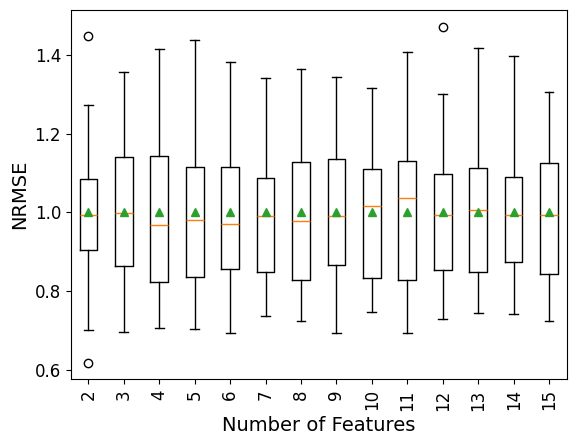

In [47]:

pyplot.boxplot(
    list(result_filtered["Normalized_Result"]),
    labels=list(result_filtered["Name"]),
    showmeans=True
)

# pyplot.title("AdaBoost Regression")
pyplot.xlabel("Number of Features", fontsize=14)
pyplot.ylabel("NRMSE", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
pyplot.show()

# Plot Coorelation Features

In [ ]:
#terra - 13
df = monthly_dataset[[
    'aet',
    'def',
    'pdsi',
    'pet',
    'pr',
    'ro',
    'soil',
    'srad',
    'tmmx',
    'tmmn',
    'vap',
    'vpd',
    'vs',
    'ET_fill']]

df = df.rename(columns={'def': 'Wdef',
                        'srad': 'Srad',
                        'tmmx': 'Tmax',
                        'tmmn': 'Tmin',
                        'vpd': 'Vpd',
                        'ET_fill': 'ETa',
                        'pet': 'PET'})

#Era5 - 15  - 'ET_fill'
# df = monthly_dataset.drop(['aet',
#                            'def',
#                            'pdsi',
#                            'pet',
#                            'pr',
#                            'ro',
#                            'soil',
#                            'srad',
#                            'tmmx',
#                            'tmmn',
#                            'vap',
#                            'vpd',
#                            'vs',
#                            'Site_ID',
#                            'General_classification',
#                            'Land_cover_details',
#                            'Land_cover_type',
#                            'time',
#                            'date',
#                            "category_encoded_Site_ID",
#                            "category_encoded_General_classification",
#                            "category_encoded_Land_cover_details",
#                            "category_encoded_Land_cover_type"], axis =1)

# df = df.rename(columns={'dewpoint_temperature_2m': 'dewT2m',
#                         'dewpoint_temperature_2m_max': 'dewT2m_max',
#                         'dewpoint_temperature_2m_min': 'dewT2m_min',
#                         'leaf_area_index_high_vegetation': 'lai_high',
#                         'leaf_area_index_low_vegetation': 'lai_low',
#                         'soil_temperature_level_1': 'soilT_1',
#                         'soil_temperature_level_2': 'soilT_2',
#                         'soil_temperature_level_3': 'soilT_3',
#                         'soil_temperature_level_4': 'soilT_4',
#                         'surface_net_solar_radiation_max': 'r_max',
#                         'surface_net_solar_radiation_sum': 'r_sum',
#                         'surface_pressure': 's_pressure',
#                         'surface_pressure_max': 's_p_max',
#                         'surface_pressure_min': 's_p_min',
#                         'surface_sensible_heat_flux_max': 'ss_heat_flux_max',
#                         'surface_solar_radiation_downwards_max': 'ss_r_d_max',
#                         'surface_thermal_radiation_downwards_max': 'st_r_d_max',
#                         'surface_thermal_radiation_downwards_min': 'st_r_d_min',
#                         'temperature_2m': 'T_2m',
#                         'temperature_2m_max': 'T_2m_max',
#                         'temperature_2m_min': 'T_2m_min',
#                         'total_precipitation_max': 'pr_max',
#                         'u_component_of_wind_10m_max': 'u_wind_10m_max',
#                         'v_component_of_wind_10m_max': 'v_wind_10m_max',
#                         'volumetric_soil_water_layer_1': 'soil_water_1',
#                         'volumetric_soil_water_layer_2': 'soil_water_2',
#                         'volumetric_soil_water_layer_3': 'soil_water_3',
#                         'volumetric_soil_water_layer_4': 'soil_water_4'})

## Correlation Matrix

In [ ]:
# Function to plot correlation matrix
def plot_correlation_matrix(data, n_features=10, include_feature=None):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find the top n_features pairs with the highest absolute correlation
    top_corr = upper.abs().unstack().sort_values(ascending=False).head(n_features)

    # Get unique features from top correlations
    unique_features = list(set(top_corr.index.get_level_values(0)) | set(top_corr.index.get_level_values(1)))

    # Ensure the specified feature is included
    if include_feature and include_feature in data.columns:
        unique_features.append(include_feature)

    # Remove duplicates while preserving order
    unique_features = list(dict.fromkeys(unique_features))

    # Create a subset of the correlation matrix with only the top correlated features
    corr_subset = corr_matrix.loc[unique_features, unique_features]

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Create a heatmap
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

    plt.title(f'Correlation Matrix of Top {n_features} Correlated Feature Pairs')
    plt.tight_layout()
    plt.show()

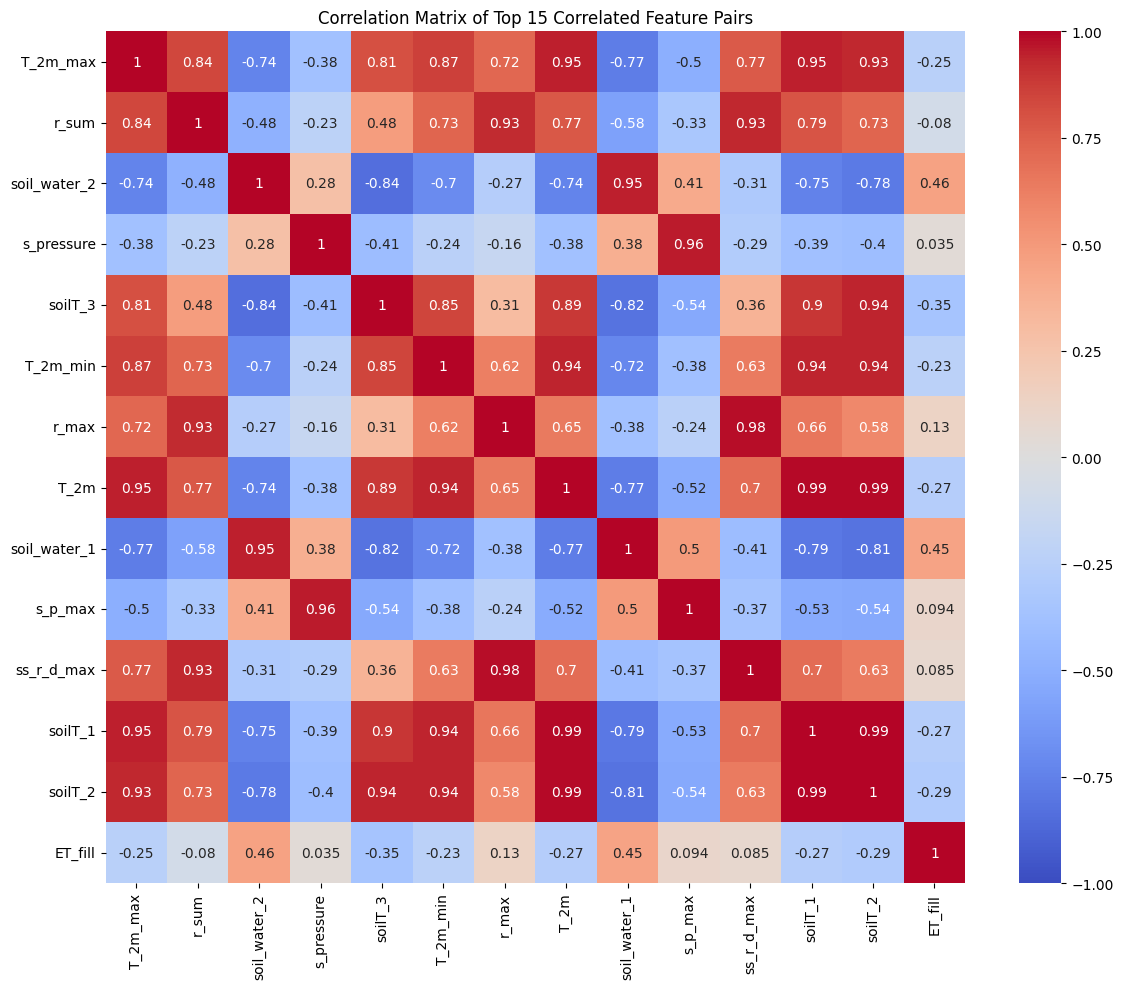

In [ ]:
plot_correlation_matrix(df, n_features=15, include_feature="ET_fill")

## Scatter Matrix

In [ ]:
def plot_scatter_matrix_highest(data, n_features=5, include_feature=None):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
    to_drop = sorted(to_drop, key=lambda x: upper[x].max(), reverse=True)
    top_features = to_drop[:n_features]

    if include_feature and include_feature in data.columns:
        if include_feature not in top_features:
            top_features.append(include_feature)

    df_subset = data[top_features]
    plot_scatter_matrix(df_subset, top_features, f'Top {n_features} Correlated Features')


def plot_scatter_matrix_lowest(data, n_features=5, include_feature=None):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [column for column in upper.columns if any(upper[column] < 0.5)]
    to_keep = sorted(to_keep, key=lambda x: upper[x].max())
    lowest_features = to_keep[:n_features]

    if include_feature and include_feature in data.columns:
        if include_feature not in lowest_features:
            lowest_features.append(include_feature)

    df_subset = data[lowest_features]
    plot_scatter_matrix(df_subset, lowest_features, f'Least {n_features} Correlated Features')


def plot_scatter_matrix(df_subset, features, title):
    from scipy.stats import pearsonr
    n_features = len(features)
    fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(12, 10))

    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            ax = axes[i, j]

            if i != j:
                ax.scatter(df_subset[feature2], df_subset[feature1], alpha=0.5, color='black', s=10)
                z = np.polyfit(df_subset[feature2], df_subset[feature1], 1)
                p = np.poly1d(z)
                ax.plot(df_subset[feature2], p(df_subset[feature2]), "r--", alpha=0.8)

                r, _ = pearsonr(df_subset[feature2], df_subset[feature1])
                ax.text(0.05, 0.9, f'R={r:.2f}', transform=ax.transAxes, fontsize=12, color='blue')

                if i == n_features - 1:
                    ax.set_xlabel(feature2)
                if j == 0:
                    ax.set_ylabel(feature1)
            else:
                ax.hist(df_subset[feature1], bins=20, color='gray')

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            if i < n_features - 1:
                ax.set_xticks([])
            if j > 0:
                ax.set_yticks([])

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()


### Highest Features

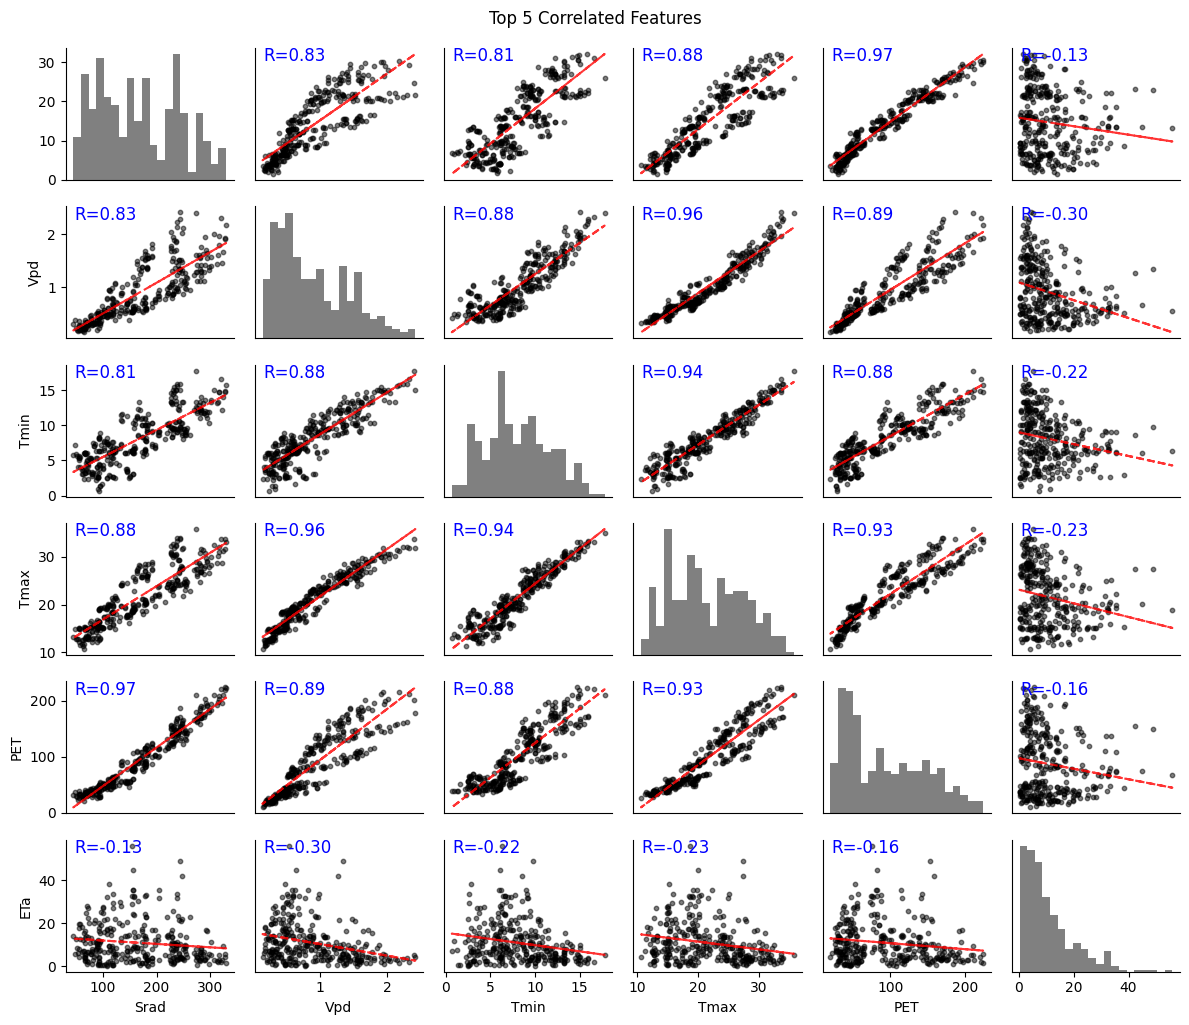

In [ ]:
plot_scatter_matrix_highest(df, n_features=5, include_feature='ETa')

### Lowest Features

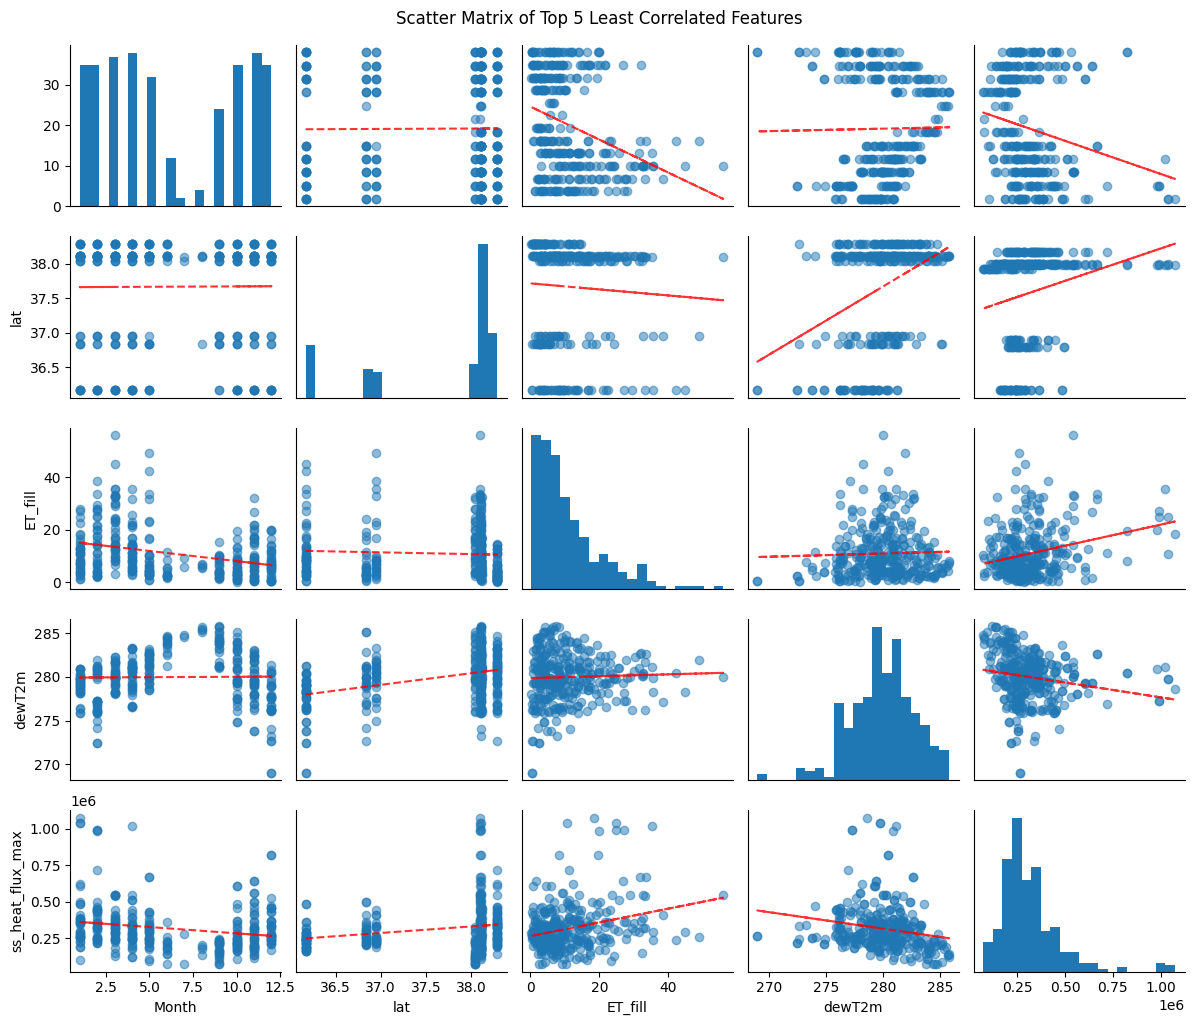

In [ ]:
plot_scatter_matrix_lowest(df, n_features=5)

# RandomForestRegressor

## search best hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
param_dist_rf = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 20, None],
    'random_state': [22]
}

best_param_rf, best_model_rf = searchcv(
    param_dict =param_dist_rf,
    model = RandomForestRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 22}


In [ ]:
def create_model_with_n_features_cv(X, y, n_features):

    # selector = SelectFromModel(
    #     best_model_rf,
    #     max_features=n_features,
    #     threshold=-np.inf
    # )
    selector = RFE(estimator=best_model_rf, n_features_to_select=n_features)
    selector.fit(X, y)
    base_model = RandomForestRegressor(n_estimators=10)

    model = Pipeline(steps=[
        ('feature_selection', selector),
        ('regressor', base_model)
    ])

    selected_features = X.columns[selector.support_]
    cv = KFold(n_splits=10, shuffle=True, random_state=1)


    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

    r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    rmse_scores = -scores

    return model, rmse_scores, r2, selected_features
result = dict()
for n_features in range(2,X.shape[1]+1):
  # n_features = 6
  model, rmse_scores, r2, selected_features = create_model_with_n_features_cv(X, y, n_features)
  print(f"Model trained with top {n_features} features, Cross-Validation RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")
  print(f"Model trained with top {n_features} features, Cross-Validation R2: {np.mean(r2):.3f} ± {np.std(r2):.3f}")
  print(f"Model trained with top {n_features} features, Features selection: {selected_features}")

  result = {
      'Model': [f'RF_{n_features}'],
      'R-squared': [r2],
      'Standard_Deviation for R2': [np.std(r2)],
      'RMSE': [rmse_scores],
      'Standard_Deviation for RMSE': [np.std(rmse_scores)],
      'NRMSE': [rmse_scores / (np.max(y) - np.min(y))],
      'Selected Features': [selected_features]
    }

Model trained with top 2 features, Cross-Validation RMSE: 7.631 ± 1.300
Model trained with top 2 features, Cross-Validation R2: 0.375 ± 0.214
Model trained with top 2 features, Features selection: Index(['ppt', 'surface_net_solar_radiation_max'], dtype='object')
Model trained with top 3 features, Cross-Validation RMSE: 6.217 ± 1.148
Model trained with top 3 features, Cross-Validation R2: 0.553 ± 0.135
Model trained with top 3 features, Features selection: Index(['ppt', 'lat', 'surface_net_solar_radiation_max'], dtype='object')
Model trained with top 4 features, Cross-Validation RMSE: 6.107 ± 1.347
Model trained with top 4 features, Cross-Validation R2: 0.537 ± 0.140
Model trained with top 4 features, Features selection: Index(['ppt', 'lat', 'surface_net_solar_radiation_max',
       'surface_thermal_radiation_downwards_max'],
      dtype='object')
Model trained with top 5 features, Cross-Validation RMSE: 5.945 ± 0.966
Model trained with top 5 features, Cross-Validation R2: 0.565 ± 0.148

In [ ]:
df = pd.DataFrame(result)
df

Model                                          R-squared  \
0  RF_48  [0.4294334361792589, 0.5812857276754932, 0.548...   

   Standard_Deviation for R2  \
0                   0.104187   

                                                RMSE  \
0  [4.952358381801033, 6.999376584190133, 8.43459...   

   Standard_Deviation for RMSE  \
0                      1.15361   

                                               NRMSE  \
0  [0.08904363388221914, 0.12584911630319967, 0.1...   

                                   Selected Features  
0  Index(['Year', 'Month', 'ppt', 'lat', 'lon', '...

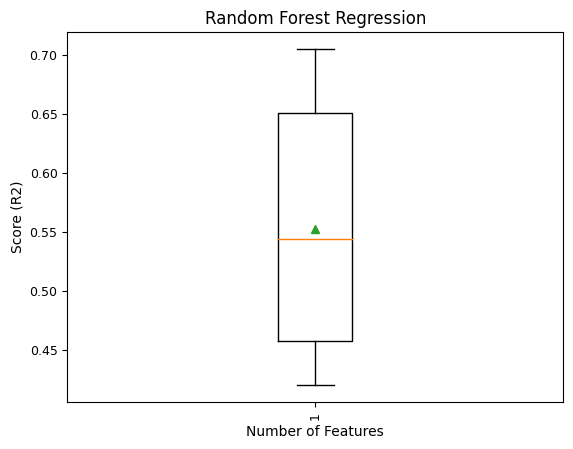

In [ ]:
pyplot.boxplot(
    list(r2),
    labels=[1],
    showmeans=True
)

pyplot.title("Random Forest Regression")
pyplot.xlabel("Number of Features")
pyplot.ylabel("Score (R2)")
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
pyplot.show()

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_mse = cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_rf, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [-10.16614628  -4.50687277  -9.35832866  -5.70008633  -5.28750816]
Mean CV Score_mse: -7.00378843981112
Cross-Validation Scores_r2: [0.13331651 0.64245028 0.30603844 0.58096012 0.39307386]
Mean CV Score_r2: 0.41116784219169655


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed
models = dict()
# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_rf, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    base_model = RandomForestRegressor(n_estimators=10)
    models[str(n_features_to_select)] = Pipeline(steps=[('s',selector),('m',base_model)])

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_rf = {
        'Model': [f'RF_{n_features_to_select}'],
        'best_model': [best_model_rf],
        'best_hyperparam' : [best_param_rf],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    rf = pd.DataFrame(metrics_rf)
    index_result = pd.concat([index_result, rf], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [11:11<00:00, 14.28s/it]


Model                                         best_model  \
0    RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1    RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2    RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3    RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4    RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
5    RF_7  (DecisionTreeRegressor(max_features=1.0, min_s...   
6    RF_8  (DecisionTreeRegressor(max_features=1.0, min_s...   
7    RF_9  (DecisionTreeRegressor(max_features=1.0, min_s...   
8   RF_10  (DecisionTreeRegressor(max_features=1.0, min_s...   
9   RF_11  (DecisionTreeRegressor(max_features=1.0, min_s...   
10  RF_12  (DecisionTreeRegressor(max_features=1.0, min_s...   
11  RF_13  (DecisionTreeRegressor(max_features=1.0, min_s...   
12  RF_14  (DecisionTreeRegressor(max_features=1.0, min_s...   
13  RF_15  (DecisionTreeRegressor(max_features=1.0, min_s...   
14  RF_16  (DecisionTreeRegressor(max_features=1.0, min_s...   
15  RF_17  (DecisionTreeRegressor(max_features=1.0, min_s...   
16  RF_18  (DecisionTreeRegressor(max_features=1.0, min_s...   
17  RF_19  (DecisionTreeRegressor(max_features=1.0, min_s...   
18  RF_20  (DecisionTreeRegressor(max_features=1.0, min_s...   
19  RF_21  (DecisionTreeRegressor(max_features=1.0, min_s...   
20  RF_22  (DecisionTreeRegressor(max_features=1.0, min_s...   
21  RF_23  (DecisionTreeRegressor(max_features=1.0, min_s...   
22  RF_24  (DecisionTreeRegressor(max_features=1.0, min_s...   
23  RF_25  (DecisionTreeRegressor(max_features=1.0, min_s...   
24  RF_26  (DecisionTreeRegressor(max_features=1.0, min_s...   
25  RF_27  (DecisionTreeRegressor(max_features=1.0, min_s...   
26  RF_28  (DecisionTreeRegressor(max_features=1.0, min_s...   
27  RF_29  (DecisionTreeRegressor(max_features=1.0, min_s...   
28  RF_30  (DecisionTreeRegressor(max_features=1.0, min_s...   
29  RF_31  (DecisionTreeRegressor(max_features=1.0, min_s...   
30  RF_32  (DecisionTreeRegressor(max_features=1.0, min_s...   
31  RF_33  (DecisionTreeRegressor(max_features=1.0, min_s...   
32  RF_34  (DecisionTreeRegressor(max_features=1.0, min_s...   
33  RF_35  (DecisionTreeRegressor(max_features=1.0, min_s...   
34  RF_36  (DecisionTreeRegressor(max_features=1.0, min_s...   
35  RF_37  (DecisionTreeRegressor(max_features=1.0, min_s...   
36  RF_38  (DecisionTreeRegressor(max_features=1.0, min_s...   
37  RF_39  (DecisionTreeRegressor(max_features=1.0, min_s...   
38  RF_40  (DecisionTreeRegressor(max_features=1.0, min_s...   
39  RF_41  (DecisionTreeRegressor(max_features=1.0, min_s...   
40  RF_42  (DecisionTreeRegressor(max_features=1.0, min_s...   
41  RF_43  (DecisionTreeRegressor(max_features=1.0, min_s...   
42  RF_44  (DecisionTreeRegressor(max_features=1.0, min_s...   
43  RF_45  (DecisionTreeRegressor(max_features=1.0, min_s...   
44  RF_46  (DecisionTreeRegressor(max_features=1.0, min_s...   
45  RF_47  (DecisionTreeRegressor(max_features=1.0, min_s...   
46  RF_48  (DecisionTreeRegressor(max_features=1.0, min_s...   

                                      best_hyperparam  \
0   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
5   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
6   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
7   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
8   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
9   {'max_depth': None, 'max_leaf_nodes': None, 'm...   
10  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
11  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
12  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
13  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
14  {'max_depth': None, 'max_leaf_nodes': None, 'm...   
15  {'max_depth': N

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_rf26oct.csv")

In [ ]:
def evaluate_model(model, x, y):
    cv = RepeatedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1
    )
    scores = cross_val_score(
        model,
        x,
        y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return scores


results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 -7.297 (1.628)
>3 -6.401 (1.264)
>4 -5.992 (1.390)
>5 -5.728 (1.132)
>6 -5.957 (1.209)
>7 -5.999 (1.215)
>8 -5.914 (1.106)
>9 -5.945 (1.066)
>10 -6.009 (1.224)
>11 -5.886 (1.259)
>12 -5.902 (1.148)
>13 -6.022 (1.340)
>14 -5.911 (1.174)
>15 -5.913 (1.197)


In [ ]:
n_features_to_select = 11
selector = RFE(estimator = best_model_rf, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

y_train_pred = selector.predict(X_train)


y_test_pred = selector.predict(X_test)


print('Selected Features: ', selected_features)




Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_the_top_of_canopy_min',
       'evaporation_from_the_top_of_canopy_sum', 'forecast_albedo',
       'leaf_area_index_high_vegetation_min',
       'surface_thermal_radiation_downwards_max', 'total_evaporation_min',
       'volumetric_soil_water_layer_3_min', 'aet'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.8023782509189203
NSE: 0.9134635335203192
NRMSE: 0.05044332470762999
R-squared: 0.9323629310436725
R: 0.9655894215678176
standard deviation: 7.890189874380215


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.384717297769033
NSE: 0.6610482077162332
NRMSE: 0.12864997362102296
R-squared: 0.6712723271422135
R: 0.8193121060635035
standard deviation: 6.647155084958341


In [ ]:

metrics_rf = {
    'Model':[f'RF_{n_features_to_select}'],
    'R_train':[r_train],
    'R-squared_train':[r2_train],
    'RMSE_train':[rmse_train],
    'NRMSE_train':[nrmse_train],
    'NSE_train':[nse_train],
    'Standard_Deviation_train':[std_train],
    'R_test':[r_test],
    'R-squared_test':[r2_test],
    'RMSE_test':[rmse_test],
    'NRMSE_test':[nrmse_test],
    'NSE_test':[nse_test],
    'Standard_Deviation_test':[std_test],
    'Selected Features':[selected_features]
}

rf = pd.DataFrame(metrics_rf)
index_result = pd.concat([rf, index_result])
index_result

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0  RF_11  0.965589         0.932363    2.802378     0.050443   0.913464   
0  RF_10  0.966644         0.934401    2.765895     0.049787   0.915702   
0   RF_9  0.965218         0.931646    2.790133     0.050223   0.914218   
0   RF_8  0.965237         0.931683    2.772074     0.049898   0.915325   
0   RF_7  0.963311         0.927968    2.830547     0.050950   0.911715   
0   RF_6  0.954328         0.910742    3.105996     0.055908   0.893697   
0   RF_5  0.952295         0.906866    3.174093     0.057134   0.888984   
0   RF_4  0.947469         0.897698    3.264763     0.058766   0.882551   

   Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                  7.890190  0.819312        0.671272   5.384717    0.128650   
0                  7.908339  0.822157        0.675942   5.360771    0.128078   
0                  7.939125  0.820782        0.673683   5.347224    0.127754   
0                  7.980557  0.819109        0.670940   5.365498    0.128191   
0                  7.965239  0.807333        0.651787   5.507990    0.131595   
0                  7.848164  0.774057        0.599164   5.907801    0.141147   
0                  7.800069  0.773389        0.598131   5.920372    0.141448   
0                  7.856380  0.762840        0.581925   5.999975    0.143350   

   NSE_test  Standard_Deviation_test  \
0  0.661048                 6.647155   
0  0.664056                 6.596061   
0  0.665752                 6.786148   
0  0.663463                 6.798966   
0  0.645351                 6.735973   
0  0.591997                 6.382521   
0  0.590258                 6.353941   
0  0.579166                 6.584809   

                                   Selected Features  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'lat',
       'evaporation_from_...  
0  Index(['ppt', 'evaporation_from_open_water_sur...  
0  Index(['ppt', 'evaporation_from_open_water_sur...  
0  Index(['ppt', 'evaporation_from_open_water_sur...

In [ ]:
index_result.to_csv('/content/drive/MyDrive/EC_Tower/result/re_indec.csv')

## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = index_result.loc[index_result['Model']== optimum_n_features]["y_test_pred"].values[0].tolist(),
    y = index_result.loc[index_result['Model']== optimum_n_features]["y_test"].values[0].tolist(),
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 50,
    y1 = 50,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# AdaBoostRegressor

## search best hyperparameters

In [ ]:
param_dist_Ada = {'n_estimators': range(5, 16, 5),
                  'learning_rate': np.logspace(-2, 2, 4),
                  'loss': ('linear', 'square', 'exponential')
                  }

best_param_Ada, best_model_Ada = searchcv(
    param_dict = param_dist_Ada,
    model = AdaBoostRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'learning_rate': 0.21544346900318834, 'loss': 'square', 'n_estimators': 15}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Ada, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Ada, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [14.66626189 30.74463821 49.21098924 23.45163763  8.23990993]
Mean CV Score_mse: 25.262687377580107
Cross-Validation Scores_r2: [-0.06746957  0.44766591 -0.29660034 -0.05958653 -3.06758221]
Mean CV Score_r2: -0.6087145464974956


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_Ada, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Ada = {
        'Model': [f'Ada_{n_features_to_select}'],
        'best_model': [best_model_Ada],
        'best_hyperparam' : [best_param_Ada],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Ada = pd.DataFrame(metrics_Ada)
    index_result = pd.concat([index_result, Ada], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [01:32<00:00,  1.97s/it]


Model                                         best_model  \
0      RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1      RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2      RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3      RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4      RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
..      ...                                                ...   
136  Ada_44  (DecisionTreeRegressor(max_depth=3, random_sta...   
137  Ada_45  (DecisionTreeRegressor(max_depth=3, random_sta...   
138  Ada_46  (DecisionTreeRegressor(max_depth=3, random_sta...   
139  Ada_47  (DecisionTreeRegressor(max_depth=3, random_sta...   
140  Ada_48  (DecisionTreeRegressor(max_depth=3, random_sta...   

                                       best_hyperparam  \
0    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
..                                                 ...   
136  {'learning_rate': 0.21544346900318834, 'loss':...   
137  {'learning_rate': 0.21544346900318834, 'loss':...   
138  {'learning_rate': 0.21544346900318834, 'loss':...   
139  {'learning_rate': 0.21544346900318834, 'loss':...   
140  {'learning_rate': 0.21544346900318834, 'loss':...   

                                              selector  \
0    RFE(estimator=RandomForestRegressor(min_sample...   
1    RFE(estimator=RandomForestRegressor(min_sample...   
2    RFE(estimator=RandomForestRegressor(min_sample...   
3    RFE(estimator=RandomForestRegressor(min_sample...   
4    RFE(estimator=RandomForestRegressor(min_sample...   
..                                                 ...   
136  RFE(estimator=AdaBoostRegressor(learning_rate=...   
137  RFE(estimator=AdaBoostRegressor(learning_rate=...   
138  RFE(estimator=AdaBoostRegressor(learning_rate=...   
139  RFE(estimator=AdaBoostRegressor(learning_rate=...   
140  RFE(estimator=AdaBoostRegressor(learning_rate=...   

                                               X_train  \
0         Year  Month      ppt        lat         l...   
1         Year  Month      ppt        lat         l...   
2         Year  Month      ppt        lat         l...   
3         Year  Month      ppt        lat         l...   
4         Year  Month      ppt        lat         l...   
..                                                 ...   
136       Year  Month      ppt        lat         l...   
137       Year  Month      ppt        lat         l...   
138       Year  Month      ppt        lat         l...   
139       Year  Month      ppt        lat         l...   
140       Year  Month      ppt        lat         l...   

                                               y_train  \
0    111     7.150572
247     5.450234
233    19.96...   
1    111     7.150572
247     5.450234
233    19.96...   
2    111     7.150572
247     5.450234
233    19.96...   
3    111     7.150572
247     5.450234
233    19.96...   
4    111     7.150572
247     5.450234
233    19.96...   
..                                                 ...   
136  111     7.150572
247     5.450234
233    19.96...   
137  111     7.150572
247     5.450234
233    19.96...   
138  111     7.150572
247     5.450234
233    19.96...   
139  111     7.150572
247     5.450234
233    19.96...   
140  111     7.150572
247     5.450234
233    19.96...   

                                                X_test  \
0         Year  Month     ppt        lat         lo...   
1         Year  Month     ppt        lat         lo...   
2         Year  Month     ppt        lat         lo...   
3         Year  Month     ppt        lat         lo...   
4         Year  Month     ppt        lat         lo...   
..                                                 ...   
136       Year  Mon

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Ada_1Mar.csv")

In [ ]:
n_features_to_select = 5
selector = RFE(estimator = best_model_Ada, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

selector.fit(X_train, y_train)

y_train_pred = selector.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = selector.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat', 'evaporation_from_the_top_of_canopy_sum',
       'surface_thermal_radiation_downwards_max', 'total_evaporation_min'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.352778933260823
NSE: 0.6842784214811545
NRMSE: 0.09635100676723353
R-squared: 0.6920944914787589
R: 0.8319221667191943
standard deviation: 7.163444906289869


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.8651229783273315
NSE: 0.5978701005206921
NRMSE: 0.14012767518147834
R-squared: 0.6103267792068713
R: 0.7812341385313825
standard deviation: 6.230542686239689


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# BaggingRegressor

## search best hyperparameters

In [ ]:
param_dist_Bagging = {'n_estimators': [5, 10, 20, 50, 75],
                      'max_samples' : [0.2, 0.5, 0.75, 1],
                      'max_features': [0.5, 0.75, 1],
                      'bootstrap':[True, False]}



best_param_Bagging, best_model_Bagging = searchcv(
    param_dict = param_dist_Bagging,
    model = BaggingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'bootstrap': True, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 75}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [25.6310814  55.44080256 61.45642564 19.74774813  9.89112529]
Mean CV Score_mse: 34.43343660218089
Cross-Validation Scores_r2: [ 0.10829756 -0.27996629 -0.20884208  0.05988535 -0.76731863]
Mean CV Score_r2: -0.21758881871048502


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1) # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_Bagging)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_bagging = {
        'Model': [f'Bagging_{n_features_to_select}'],
        'best_model': [best_model_Bagging],
        'best_hyperparam' : [best_param_Bagging],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    bagging = pd.DataFrame(metrics_bagging)
    index_result = pd.concat([index_result, bagging], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:12,  3.59it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')


Feature Selection Progress:   4%|▍         | 2/47 [00:00<00:15,  2.85it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


Feature Selection Progress:   6%|▋         | 3/47 [00:01<00:16,  2.72it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:   9%|▊         | 4/47 [00:01<00:16,  2.68it/s]

Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  11%|█         | 5/47 [00:01<00:16,  2.50it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:02<00:16,  2.43it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:02<00:17,  2.35it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:03<00:16,  2.33it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  19%|█▉        | 9/47 [00:03<00:17,  2.23it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  21%|██▏       | 10/47 [00:04<00:16,  2.21it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  23%|██▎       | 11/47 [00:04<00:16,  2.18it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  26%|██▌       | 12/47 [00:04<00:14,  2.38it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  28%|██▊       | 13/47 [00:05<00:13,  2.51it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  30%|██▉       | 14/47 [00:05<00:12,  2.58it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  32%|███▏      | 15/47 [00:06<00:13,  2.33it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  34%|███▍      | 16/47 [00:06<00:15,  1.99it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  36%|███▌      | 17/47 [00:07<00:17,  1.69it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:08<00:20,  1.39it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  40%|████      | 19/47 [00:09<00:19,  1.41it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:10<00:19,  1.42it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:10<00:18,  1.40it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  47%|████▋     | 22/47 [00:11<00:19,  1.31it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  49%|████▉     | 23/47 [00:12<00:19,  1.25it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  51%|█████     | 24/47 [00:13<00:20,  1.14it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  53%|█████▎    | 25/47 [00:14<00:20,  1.07it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  55%|█████▌    | 26/47 [00:16<00:22,  1.09s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  57%|█████▋    | 27/47 [00:17<00:25,  1.25s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  60%|█████▉    | 28/47 [00:19<00:25,  1.36s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:20<00:21,  1.18s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  64%|██████▍   | 30/47 [00:20<00:17,  1.04s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  66%|██████▌   | 31/47 [00:21<00:15,  1.06it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  68%|██████▊   | 32/47 [00:22<00:12,  1.16it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  70%|███████   | 33/47 [00:23<00:11,  1.17it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  72%|███████▏  | 34/47 [00:23<00:10,  1.19it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

Feature Selection Progress:  74%|███████▍  | 35/47 [00:25<00:11,  1.05it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:26<00:10,  1.02it/s]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

Feature Selection Progress:  79%|███████▊  | 37/47 [00:27<00:09,  1.07it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

Feature Selection Progress:  81%|████████  | 38/47 [00:28<00:08,  1.02it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

Feature Selection Progress:  83%|████████▎ | 39/47 [00:29<00:08,  1.07s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  85%|████████▌ | 40/47 [00:31<00:10,  1.43s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:33<00:09,  1.53s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

Feature Selection Progress:  89%|████████▉ | 42/47 [00:34<00:06,  1.37s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress:  91%|█████████▏| 43/47 [00:35<00:04,  1.23s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:36<00:03,  1.16s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

Feature Selection Progress:  96%|█████████▌| 45/47 [00:37<00:02,  1.13s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

Feature Selection Progress:  98%|█████████▊| 46/47 [00:38<00:01,  1.04s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

Feature Selection Progress: 100%|██████████| 47/47 [00:39<00:00,  1.20it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

Model                                         best_model  \
0          RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1          RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2          RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3          RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4          RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
..          ...                                                ...   
183  Bagging_44  (DecisionTreeRegressor(random_state=828347854)...   
184  Bagging_45  (DecisionTreeRegressor(random_state=828347854)...   
185  Bagging_46  (DecisionTreeRegressor(random_state=828347854)...   
186  Bagging_47  (DecisionTreeRegressor(random_state=828347854)...   
187  Bagging_48  (DecisionTreeRegressor(random_state=828347854)...   

                                       best_hyperparam  \
0    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
..                                                 ...   
183  {'bootstrap': True, 'max_features': 0.75, 'max...   
184  {'bootstrap': True, 'max_features': 0.75, 'max...   
185  {'bootstrap': True, 'max_features': 0.75, 'max...   
186  {'bootstrap': True, 'max_features': 0.75, 'max...   
187  {'bootstrap': True, 'max_features': 0.75, 'max...   

                                              selector  \
0    RFE(estimator=RandomForestRegressor(min_sample...   
1    RFE(estimator=RandomForestRegressor(min_sample...   
2    RFE(estimator=RandomForestRegressor(min_sample...   
3    RFE(estimator=RandomForestRegressor(min_sample...   
4    RFE(estimator=RandomForestRegressor(min_sample...   
..                                                 ...   
183  RFE(estimator=AdaBoostRegressor(learning_rate=...   
184  RFE(estimator=AdaBoostRegressor(learning_rate=...   
185  RFE(estimator=AdaBoostRegressor(learning_rate=...   
186  RFE(estimator=AdaBoostRegressor(learning_rate=...   
187  RFE(estimator=AdaBoostRegressor(learning_rate=...   

                                               X_train  \
0         Year  Month      ppt        lat         l...   
1         Year  Month      ppt        lat         l...   
2         Year  Month      ppt        lat         l...   
3         Year  Month      ppt        lat         l...   
4         Year  Month      ppt        lat         l...   
..                                                 ...   
183       Year  Month      ppt        lat         l...   
184       Year  Month      ppt        lat         l...   
185       Year  Month      ppt        lat         l...   
186       Year  Month      ppt        lat         l...   
187       Year  Month      ppt        lat         l...   

                                               y_train  \
0    111     7.150572
247     5.450234
233    19.96...   
1    111     7.150572
247     5.450234
233    19.96...   
2    111     7.150572
247     5.450234
233    19.96...   
3    111     7.150572
247     5.450234
233    19.96...   
4    111     7.150572
247     5.450234
233    19.96...   
..                                                 ...   
183  111     7.150572
247     5.450234
233    19.96...   
184  111     7.150572
247     5.450234
233    19.96...   
185  111     7.150572
247     5.450234
233    19.96...   
186  111     7.150572
247     5.450234
233    19.96...   
187  111     7.150572
247     5.450234
233    19.96...   

                                                X_test  \
0         Year  Month     ppt        lat         lo...   
1         Year  Month     ppt        lat         lo...   
2         Year  Month     ppt        lat         lo...   
3         Year  Month     ppt        lat         lo...   
4         Year  Month     ppt        lat         lo...   
..                               

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Bagging_1Mar.csv")

In [ ]:
n_features_to_select = 4


# Create a pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_Bagging)
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)


# Get the boolean mask of selected features
selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

# Get the feature names
feature_names = X.columns
# Print the selected feature names
selected_features = feature_names[selected_features_mask]


y_test_pred = pipeline.predict(X_test)

print('Selected Features: ', selected_features)


Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum',
       'volumetric_soil_water_layer_2', 'aet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:379: RuntimeWarning:

invalid value encountered in sqrt



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 2.2260649628015026
NSE: 0.9453963947351801
NRMSE: 0.04006957936604515
R-squared: 0.964537651619056
R: 0.9821087778953287
standard deviation: 8.038294843076853


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.451474228169324
NSE: 0.35092254097981734
NRMSE: 0.17802828075837726
R-squared: 0.3553579878600087
R: 0.5961191054311283
standard deviation: 6.073300737748699


In [ ]:

metrics_bagging = {
    'Model':['Bagging_4'],
    'R_train':[r_train],
    'R-squared_train':[r2_train],
    'RMSE_train':[rmse_train],
    'NRMSE_train':[nrmse_train],
    'NSE_train':[nse_train],
    'Standard_Deviation_train':[std_train],
    'R_test':[r_test],
    'R-squared_test':[r2_test],
    'RMSE_test':[rmse_test],
    'NRMSE_test':[nrmse_test],
    'NSE_test':[nse_test],
    'Standard_Deviation_test':[std_test]
}

index_result = pd.DataFrame(metrics_bagging)
index_result

Model   R_train  R-squared_train  RMSE_train  NRMSE_train  NSE_train  \
0  Bagging_4  0.982109         0.964538    2.226065      0.04007   0.945396   

   Standard_Deviation_train    R_test  R-squared_test  RMSE_test  NRMSE_test  \
0                  8.038295  0.596119        0.355358   7.451474    0.178028   

   NSE_test  Standard_Deviation_test  
0  0.350923                 6.073301

## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# ExtraTreesRegressor

## search best hyperparameters

In [ ]:
param_dist_ExtraTrees = {
    'n_estimators': [50,75,100],
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [2,3,4],
    'min_samples_split': [2,4,8],
    "min_impurity_decrease": [0, 0.1, 0.2],
    "bootstrap": [False]
}

best_param_ExtraTrees, best_model_ExtraTrees = searchcv(
    param_dict = param_dist_ExtraTrees,
    model = ExtraTreesRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_split': 8, 'n_estimators': 75}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
434 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [30.52252103 27.30021065 49.55711591 19.29607644  4.70100923]
Mean CV Score_mse: 26.275386653352985
Cross-Validation Scores_r2: [-0.13074735  0.18200806 -0.04483362  0.16021594  0.13476629]
Mean CV Score_r2: 0.06028186391314918


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ExtraTrees, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Etratrees = {
        'Model': [f'Etratrees_{n_features_to_select}'],
        'best_model': [best_model_ExtraTrees],
        'best_hyperparam' : [best_param_ExtraTrees],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Etratrees = pd.DataFrame(metrics_Etratrees)
    index_result = pd.concat([index_result, Etratrees], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [02:04<00:00,  2.64s/it]


Model                                         best_model  \
0            RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1            RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2            RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3            RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4            RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
..            ...                                                ...   
230  Etratrees_44  (ExtraTreeRegressor(max_depth=4, max_features=...   
231  Etratrees_45  (ExtraTreeRegressor(max_depth=4, max_features=...   
232  Etratrees_46  (ExtraTreeRegressor(max_depth=4, max_features=...   
233  Etratrees_47  (ExtraTreeRegressor(max_depth=4, max_features=...   
234  Etratrees_48  (ExtraTreeRegressor(max_depth=4, max_features=...   

                                       best_hyperparam  \
0    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
..                                                 ...   
230  {'bootstrap': False, 'max_depth': 4, 'max_feat...   
231  {'bootstrap': False, 'max_depth': 4, 'max_feat...   
232  {'bootstrap': False, 'max_depth': 4, 'max_feat...   
233  {'bootstrap': False, 'max_depth': 4, 'max_feat...   
234  {'bootstrap': False, 'max_depth': 4, 'max_feat...   

                                              selector  \
0    RFE(estimator=RandomForestRegressor(min_sample...   
1    RFE(estimator=RandomForestRegressor(min_sample...   
2    RFE(estimator=RandomForestRegressor(min_sample...   
3    RFE(estimator=RandomForestRegressor(min_sample...   
4    RFE(estimator=RandomForestRegressor(min_sample...   
..                                                 ...   
230  RFE(estimator=ExtraTreesRegressor(max_depth=4,...   
231  RFE(estimator=ExtraTreesRegressor(max_depth=4,...   
232  RFE(estimator=ExtraTreesRegressor(max_depth=4,...   
233  RFE(estimator=ExtraTreesRegressor(max_depth=4,...   
234  RFE(estimator=ExtraTreesRegressor(max_depth=4,...   

                                               X_train  \
0         Year  Month      ppt        lat         l...   
1         Year  Month      ppt        lat         l...   
2         Year  Month      ppt        lat         l...   
3         Year  Month      ppt        lat         l...   
4         Year  Month      ppt        lat         l...   
..                                                 ...   
230       Year  Month      ppt        lat         l...   
231       Year  Month      ppt        lat         l...   
232       Year  Month      ppt        lat         l...   
233       Year  Month      ppt        lat         l...   
234       Year  Month      ppt        lat         l...   

                                               y_train  \
0    111     7.150572
247     5.450234
233    19.96...   
1    111     7.150572
247     5.450234
233    19.96...   
2    111     7.150572
247     5.450234
233    19.96...   
3    111     7.150572
247     5.450234
233    19.96...   
4    111     7.150572
247     5.450234
233    19.96...   
..                                                 ...   
230  111     7.150572
247     5.450234
233    19.96...   
231  111     7.150572
247     5.450234
233    19.96...   
232  111     7.150572
247     5.450234
233    19.96...   
233  111     7.150572
247     5.450234
233    19.96...   
234  111     7.150572
247     5.450234
233    19.96...   

                                                X_test  \
0         Year  Month     ppt        lat         lo...   
1         Year  Month     ppt        lat         lo...   
2         Year  Month     ppt        lat         lo...   
3         Year  Month     ppt        lat         lo...   
4         Year  Month     ppt        lat         lo...   
..         

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Extratrees_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_ExtraTrees, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ExtraTrees.fit(X_train, y_train)

y_train_pred = best_model_ExtraTrees.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ExtraTrees.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_min',
       'total_evaporation_min', 'volumetric_soil_water_layer_1_max'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.91084756793779
NSE: 0.615013793565833
NRMSE: 0.10639634498627056
R-squared: 0.7202123619662433
R: 0.8486532636867917
standard deviation: 4.994767714097143


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 7.0619192084579945
NSE: 0.4170146930288432
NRMSE: 0.16872115463857829
R-squared: 0.47857435296813366
R: 0.691790685806143
standard deviation: 4.114453415046351


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# GradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_GB = {'learning_rate': [0.03],
                 'subsample': [0.5, 0.6],
                 'n_estimators': list(range(100, 1200, 100)),
                 'max_depth': [4,5,6,7,8,9]}



best_param_GB, best_model_GB = searchcv(
    param_dict = param_dist_GB,
    model = GradientBoostingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.6}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_GB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_GB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [29.30848669 20.56650065 51.25959554 19.66925424  3.73784242]
Mean CV Score_mse: 24.90833590712805
Cross-Validation Scores_r2: [ 0.08531147  0.46178062 -0.14974997  0.07202815 -0.05643085]
Mean CV Score_r2: 0.08258788316888725


## evaluate model in train and tset

In [ ]:
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_GB, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_GB = {
        'Model': [f'GB_{n_features_to_select}'],
        'best_model': [best_model_GB],
        'best_hyperparam' : [best_param_GB],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]

    }

    GB = pd.DataFrame(metrics_GB)
    index_result = pd.concat([index_result, GB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [26:56<00:00, 34.39s/it]


Model                                         best_model  \
0     RF_2  (DecisionTreeRegressor(max_features=1.0, min_s...   
1     RF_3  (DecisionTreeRegressor(max_features=1.0, min_s...   
2     RF_4  (DecisionTreeRegressor(max_features=1.0, min_s...   
3     RF_5  (DecisionTreeRegressor(max_features=1.0, min_s...   
4     RF_6  (DecisionTreeRegressor(max_features=1.0, min_s...   
..     ...                                                ...   
277  GB_44  ([DecisionTreeRegressor(criterion='friedman_ms...   
278  GB_45  ([DecisionTreeRegressor(criterion='friedman_ms...   
279  GB_46  ([DecisionTreeRegressor(criterion='friedman_ms...   
280  GB_47  ([DecisionTreeRegressor(criterion='friedman_ms...   
281  GB_48  ([DecisionTreeRegressor(criterion='friedman_ms...   

                                       best_hyperparam  \
0    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
1    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
2    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
3    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
4    {'max_depth': None, 'max_leaf_nodes': None, 'm...   
..                                                 ...   
277  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...   
278  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...   
279  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...   
280  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...   
281  {'learning_rate': 0.03, 'max_depth': 5, 'n_est...   

                                              selector  \
0    RFE(estimator=RandomForestRegressor(min_sample...   
1    RFE(estimator=RandomForestRegressor(min_sample...   
2    RFE(estimator=RandomForestRegressor(min_sample...   
3    RFE(estimator=RandomForestRegressor(min_sample...   
4    RFE(estimator=RandomForestRegressor(min_sample...   
..                                                 ...   
277  RFE(estimator=GradientBoostingRegressor(learni...   
278  RFE(estimator=GradientBoostingRegressor(learni...   
279  RFE(estimator=GradientBoostingRegressor(learni...   
280  RFE(estimator=GradientBoostingRegressor(learni...   
281  RFE(estimator=GradientBoostingRegressor(learni...   

                                               X_train  \
0         Year  Month      ppt        lat         l...   
1         Year  Month      ppt        lat         l...   
2         Year  Month      ppt        lat         l...   
3         Year  Month      ppt        lat         l...   
4         Year  Month      ppt        lat         l...   
..                                                 ...   
277       Year  Month      ppt        lat         l...   
278       Year  Month      ppt        lat         l...   
279       Year  Month      ppt        lat         l...   
280       Year  Month      ppt        lat         l...   
281       Year  Month      ppt        lat         l...   

                                               y_train  \
0    111     7.150572
247     5.450234
233    19.96...   
1    111     7.150572
247     5.450234
233    19.96...   
2    111     7.150572
247     5.450234
233    19.96...   
3    111     7.150572
247     5.450234
233    19.96...   
4    111     7.150572
247     5.450234
233    19.96...   
..                                                 ...   
277  111     7.150572
247     5.450234
233    19.96...   
278  111     7.150572
247     5.450234
233    19.96...   
279  111     7.150572
247     5.450234
233    19.96...   
280  111     7.150572
247     5.450234
233    19.96...   
281  111     7.150572
247     5.450234
233    19.96...   

                                                X_test  \
0         Year  Month     ppt        lat         lo...   
1         Year  Month     ppt        lat         lo...   
2         Year  Month     ppt        lat         lo...   
3         Year  Month     ppt        lat         lo...   
4         Year  Month     ppt        lat         lo...   
..                                                 ...   
277       Year  Month     ppt 

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_GB_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_GB, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]


best_model_GB.fit(X_train, y_train)

y_train_pred = best_model_GB.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_GB.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'evaporation_from_the_top_of_canopy_sum', 'forecast_albedo_min',
       'total_evaporation_min'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.5993318228918726
NSE: 0.9960419586541964
NRMSE: 0.010788083207481761
R-squared: 0.9965809082435252
R: 0.9982889903447424
standard deviation: 9.289022089502868


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.609223766549611
NSE: 0.6321949813254348
NRMSE: 0.1340138116257288
R-squared: 0.6345543114937998
R: 0.7965891735981602
standard deviation: 7.0411459526422275


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# HistGradientBoostingRegressor

## search best hyperparameters

In [ ]:
param_dist_HGB = {'loss': ['least_squares', 'poisson'],
                  'learning_rate': [0.1, 0.01, 0.8],
                  'max_iter': [50, 100, 200]}



best_param_HGB, best_model_HGB = searchcv(
    param_dict = param_dist_HGB,
    model = HistGradientBoostingRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters found:  {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 100}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_HGB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_HGB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [101.40034735  32.38629234  77.68591173  51.55569735  32.72274144]
Mean CV Score_mse: 59.150198041477026
Cross-Validation Scores_r2: [0.14967048 0.42990521 0.38442483 0.33508037 0.28963194]
Mean CV Score_r2: 0.3177425653502834


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_HGB)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_HGB = {
        'Model': [f'HGB_{n_features_to_select}'],
        'best_model': [best_model_HGB],
        'best_hyperparam' : [best_param_HGB],
        'selector' : [pipeline],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    HGB = pd.DataFrame(metrics_HGB)
    index_result = pd.concat([index_result, HGB], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:13,  3.33it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


Feature Selection Progress:   9%|▊         | 4/47 [00:00<00:08,  4.95it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:01<00:07,  5.21it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:01<00:07,  5.10it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:01<00:07,  4.96it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  21%|██▏       | 10/47 [00:02<00:07,  5.10it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  23%|██▎       | 11/47 [00:02<00:07,  4.95it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  26%|██▌       | 12/47 [00:02<00:07,  4.76it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  30%|██▉       | 14/47 [00:02<00:06,  5.08it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  32%|███▏      | 15/47 [00:03<00:06,  4.77it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:03<00:05,  5.23it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',


Feature Selection Progress:  40%|████      | 19/47 [00:03<00:05,  4.99it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:04<00:05,  4.70it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:04<00:05,  4.55it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  47%|████▋     | 22/47 [00:04<00:05,  4.41it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  49%|████▉     | 23/47 [00:04<00:05,  4.33it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_mi

Feature Selection Progress:  53%|█████▎    | 25/47 [00:05<00:04,  4.40it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  55%|█████▌    | 26/47 [00:05<00:04,  4.20it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_m

Feature Selection Progress:  60%|█████▉    | 28/47 [00:06<00:04,  4.27it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:06<00:04,  4.35it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  64%|██████▍   | 30/47 [00:06<00:03,  4.49it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  66%|██████▌   | 31/47 [00:06<00:03,  4.41it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  68%|██████▊   | 32/47 [00:06<00:03,  4.45it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  70%|███████   | 33/47 [00:07<00:03,  4.20it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


Feature Selection Progress:  72%|███████▏  | 34/47 [00:07<00:03,  4.02it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

Feature Selection Progress:  74%|███████▍  | 35/47 [00:07<00:03,  3.99it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:07<00:02,  3.99it/s]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

Feature Selection Progress:  79%|███████▊  | 37/47 [00:08<00:02,  3.90it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

Feature Selection Progress:  81%|████████  | 38/47 [00:08<00:02,  3.91it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

Feature Selection Progress:  83%|████████▎ | 39/47 [00:08<00:02,  3.78it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  85%|████████▌ | 40/47 [00:08<00:01,  4.01it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:09<00:01,  3.87it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

Feature Selection Progress:  89%|████████▉ | 42/47 [00:09<00:01,  3.75it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress:  91%|█████████▏| 43/47 [00:09<00:01,  3.58it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:10<00:00,  3.55it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

Feature Selection Progress:  96%|█████████▌| 45/47 [00:10<00:00,  3.56it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

Feature Selection Progress:  98%|█████████▊| 46/47 [00:10<00:00,  3.27it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

Feature Selection Progress: 100%|██████████| 47/47 [00:11<00:00,  4.20it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

Model                                     best_model  \
0    HGB_2  HistGradientBoostingRegressor(loss='poisson')   
1    HGB_3  HistGradientBoostingRegressor(loss='poisson')   
2    HGB_4  HistGradientBoostingRegressor(loss='poisson')   
3    HGB_5  HistGradientBoostingRegressor(loss='poisson')   
4    HGB_6  HistGradientBoostingRegressor(loss='poisson')   
5    HGB_7  HistGradientBoostingRegressor(loss='poisson')   
6    HGB_8  HistGradientBoostingRegressor(loss='poisson')   
7    HGB_9  HistGradientBoostingRegressor(loss='poisson')   
8   HGB_10  HistGradientBoostingRegressor(loss='poisson')   
9   HGB_11  HistGradientBoostingRegressor(loss='poisson')   
10  HGB_12  HistGradientBoostingRegressor(loss='poisson')   
11  HGB_13  HistGradientBoostingRegressor(loss='poisson')   
12  HGB_14  HistGradientBoostingRegressor(loss='poisson')   
13  HGB_15  HistGradientBoostingRegressor(loss='poisson')   
14  HGB_16  HistGradientBoostingRegressor(loss='poisson')   
15  HGB_17  HistGradientBoostingRegressor(loss='poisson')   
16  HGB_18  HistGradientBoostingRegressor(loss='poisson')   
17  HGB_19  HistGradientBoostingRegressor(loss='poisson')   
18  HGB_20  HistGradientBoostingRegressor(loss='poisson')   
19  HGB_21  HistGradientBoostingRegressor(loss='poisson')   
20  HGB_22  HistGradientBoostingRegressor(loss='poisson')   
21  HGB_23  HistGradientBoostingRegressor(loss='poisson')   
22  HGB_24  HistGradientBoostingRegressor(loss='poisson')   
23  HGB_25  HistGradientBoostingRegressor(loss='poisson')   
24  HGB_26  HistGradientBoostingRegressor(loss='poisson')   
25  HGB_27  HistGradientBoostingRegressor(loss='poisson')   
26  HGB_28  HistGradientBoostingRegressor(loss='poisson')   
27  HGB_29  HistGradientBoostingRegressor(loss='poisson')   
28  HGB_30  HistGradientBoostingRegressor(loss='poisson')   
29  HGB_31  HistGradientBoostingRegressor(loss='poisson')   
30  HGB_32  HistGradientBoostingRegressor(loss='poisson')   
31  HGB_33  HistGradientBoostingRegressor(loss='poisson')   
32  HGB_34  HistGradientBoostingRegressor(loss='poisson')   
33  HGB_35  HistGradientBoostingRegressor(loss='poisson')   
34  HGB_36  HistGradientBoostingRegressor(loss='poisson')   
35  HGB_37  HistGradientBoostingRegressor(loss='poisson')   
36  HGB_38  HistGradientBoostingRegressor(loss='poisson')   
37  HGB_39  HistGradientBoostingRegressor(loss='poisson')   
38  HGB_40  HistGradientBoostingRegressor(loss='poisson')   
39  HGB_41  HistGradientBoostingRegressor(loss='poisson')   
40  HGB_42  HistGradientBoostingRegressor(loss='poisson')   
41  HGB_43  HistGradientBoostingRegressor(loss='poisson')   
42  HGB_44  HistGradientBoostingRegressor(loss='poisson')   
43  HGB_45  HistGradientBoostingRegressor(loss='poisson')   
44  HGB_46  HistGradientBoostingRegressor(loss='poisson')   
45  HGB_47  HistGradientBoostingRegressor(loss='poisson')   
46  HGB_48  HistGradientBoostingRegressor(loss='poisson')   

                                      best_hyperparam  \
0   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
1   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
2   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
3   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
4   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
5   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
6   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
7   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
8   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
9   {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
10  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
11  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
12  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
13  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
14  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
15  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
16  {'learning_rate': 0.1, 'loss': 'poisson', 'max...   
17  {'learning_rate': 0.1, 'loss': 'poisson', 'max

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_HGB_1Mar.csv")

In [ ]:
# selector = RFE(estimator = best_model_HGB, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]


best_model_HGB.fit(X_train, y_train)

y_train_pred = best_model_HGB.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_HGB.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.8792833633226798
NSE: 0.9914807107787356
NRMSE: 0.015827262501612312
R-squared: 0.9921214031705673
R: 0.9960529118327838
standard deviation: 9.247633129329303


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.344484052080223
NSE: 0.6660944091743636
NRMSE: 0.1276887335576499
R-squared: 0.6764229026632415
R: 0.8224493313653075
standard deviation: 7.593548796924162


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Multi-layer Perceptron regressor

## search best hyperparameters

In [ ]:
param_dist_MLPR = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}


best_param_MLPR, best_model_MLPR = searchcv(
    param_dict = param_dist_MLPR,
    model = MLPRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-Validation Scores_mse: [100.23086164  71.35978152  97.33513097  45.67791154  39.12994172]
Mean CV Score_mse: 70.7467254772246


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores_r2: [ 0.23031925 -0.50688146  0.18905523  0.27016428  0.18003571]
Mean CV Score_r2: 0.07253860035065204


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_MLPR)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_MLPR = {
        'Model': [f'MLPR_{n_features_to_select}'],
        'best_model': [best_model_MLPR],
        'best_hyperparam' : [best_param_MLPR],
        'selector' : [pipeline],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    MLPR = pd.DataFrame(metrics_MLPR)
    index_result = pd.concat([index_result, MLPR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:22,  2.04it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   4%|▍         | 2/47 [00:01<00:39,  1.14it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   6%|▋         | 3/47 [00:02<00:44,  1.01s/it]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:   9%|▊         | 4/47 [00:04<00:53,  1.25s/it]

Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  11%|█         | 5/47 [00:05<00:45,  1.09s/it]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')


Feature Selection Progress:  13%|█▎        | 6/47 [00:06<00:40,  1.01it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  15%|█▍        | 7/47 [00:06<00:34,  1.15it/s]

Selected Features:  Index(['ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


Feature Selection Progress:  17%|█▋        | 8/47 [00:07<00:32,  1.19it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  19%|█▉        | 9/47 [00:07<00:28,  1.35it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  21%|██▏       | 10/47 [00:08<00:26,  1.42it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  23%|██▎       | 11/47 [00:09<00:23,  1.54it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  26%|██▌       | 12/47 [00:09<00:21,  1.66it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  28%|██▊       | 13/47 [00:10<00:19,  1.73it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  30%|██▉       | 14/47 [00:10<00:18,  1.74it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  32%|███▏      | 15/47 [00:11<00:18,  1.72it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  34%|███▍      | 16/47 [00:11<00:17,  1.79it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  36%|███▌      | 17/47 [00:12<00:22,  1.35it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')


Feature Selection Progress:  38%|███▊      | 18/47 [00:14<00:25,  1.16it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  40%|████      | 19/47 [00:15<00:28,  1.01s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd'],
      dtype='object')


Feature Selection Progress:  43%|████▎     | 20/47 [00:16<00:25,  1.07it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  45%|████▍     | 21/47 [00:17<00:26,  1.01s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  47%|████▋     | 22/47 [00:19<00:30,  1.24s/it]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  49%|████▉     | 23/47 [00:21<00:34,  1.45s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


Feature Selection Progress:  51%|█████     | 24/47 [00:22<00:34,  1.48s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  53%|█████▎    | 25/47 [00:23<00:31,  1.43s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  55%|█████▌    | 26/47 [00:25<00:28,  1.37s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  57%|█████▋    | 27/47 [00:26<00:27,  1.35s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  60%|█████▉    | 28/47 [00:27<00:25,  1.33s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs'],
      dtype='object')


Feature Selection Progress:  62%|██████▏   | 29/47 [00:28<00:20,  1.12s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  64%|██████▍   | 30/47 [00:29<00:20,  1.18s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  66%|██████▌   | 31/47 [00:31<00:19,  1.21s/it]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  68%|██████▊   | 32/47 [00:32<00:18,  1.25s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  70%|███████   | 33/47 [00:34<00:19,  1.39s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  72%|███████▏  | 34/47 [00:36<00:20,  1.58s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_t

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  74%|███████▍  | 35/47 [00:37<00:19,  1.66s/it]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  77%|███████▋  | 36/47 [00:39<00:16,  1.49s/it]

Selected Features:  Index(['Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encode

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  79%|███████▊  | 37/47 [00:40<00:14,  1.42s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'categor

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  81%|████████  | 38/47 [00:41<00:12,  1.41s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  83%|████████▎ | 39/47 [00:43<00:11,  1.38s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  85%|████████▌ | 40/47 [00:44<00:09,  1.36s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_classification',
       'category_

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  87%|████████▋ | 41/47 [00:45<00:08,  1.36s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'category_encoded_General_cla

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  89%|████████▉ | 42/47 [00:47<00:06,  1.37s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Feature Selection Progress:  91%|█████████▏| 43/47 [00:48<00:05,  1.50s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'ca

Feature Selection Progress:  94%|█████████▎| 44/47 [00:50<00:04,  1.53s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tm

<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  96%|█████████▌| 45/47 [00:51<00:02,  1.31s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
    

<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress:  98%|█████████▊| 46/47 [00:52<00:01,  1.21s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress: 100%|██████████| 47/47 [00:52<00:00,  1.12s/it]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_max', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_net_solar_radiation_sum', 'surface_pressure',
       'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_la

Model                                         best_model  \
0    MLPR_2  MLPRegressor(activation='tanh', hidden_layer_s...   
1    MLPR_3  MLPRegressor(activation='tanh', hidden_layer_s...   
2    MLPR_4  MLPRegressor(activation='tanh', hidden_layer_s...   
3    MLPR_5  MLPRegressor(activation='tanh', hidden_layer_s...   
4    MLPR_6  MLPRegressor(activation='tanh', hidden_layer_s...   
5    MLPR_7  MLPRegressor(activation='tanh', hidden_layer_s...   
6    MLPR_8  MLPRegressor(activation='tanh', hidden_layer_s...   
7    MLPR_9  MLPRegressor(activation='tanh', hidden_layer_s...   
8   MLPR_10  MLPRegressor(activation='tanh', hidden_layer_s...   
9   MLPR_11  MLPRegressor(activation='tanh', hidden_layer_s...   
10  MLPR_12  MLPRegressor(activation='tanh', hidden_layer_s...   
11  MLPR_13  MLPRegressor(activation='tanh', hidden_layer_s...   
12  MLPR_14  MLPRegressor(activation='tanh', hidden_layer_s...   
13  MLPR_15  MLPRegressor(activation='tanh', hidden_layer_s...   
14  MLPR_16  MLPRegressor(activation='tanh', hidden_layer_s...   
15  MLPR_17  MLPRegressor(activation='tanh', hidden_layer_s...   
16  MLPR_18  MLPRegressor(activation='tanh', hidden_layer_s...   
17  MLPR_19  MLPRegressor(activation='tanh', hidden_layer_s...   
18  MLPR_20  MLPRegressor(activation='tanh', hidden_layer_s...   
19  MLPR_21  MLPRegressor(activation='tanh', hidden_layer_s...   
20  MLPR_22  MLPRegressor(activation='tanh', hidden_layer_s...   
21  MLPR_23  MLPRegressor(activation='tanh', hidden_layer_s...   
22  MLPR_24  MLPRegressor(activation='tanh', hidden_layer_s...   
23  MLPR_25  MLPRegressor(activation='tanh', hidden_layer_s...   
24  MLPR_26  MLPRegressor(activation='tanh', hidden_layer_s...   
25  MLPR_27  MLPRegressor(activation='tanh', hidden_layer_s...   
26  MLPR_28  MLPRegressor(activation='tanh', hidden_layer_s...   
27  MLPR_29  MLPRegressor(activation='tanh', hidden_layer_s...   
28  MLPR_30  MLPRegressor(activation='tanh', hidden_layer_s...   
29  MLPR_31  MLPRegressor(activation='tanh', hidden_layer_s...   
30  MLPR_32  MLPRegressor(activation='tanh', hidden_layer_s...   
31  MLPR_33  MLPRegressor(activation='tanh', hidden_layer_s...   
32  MLPR_34  MLPRegressor(activation='tanh', hidden_layer_s...   
33  MLPR_35  MLPRegressor(activation='tanh', hidden_layer_s...   
34  MLPR_36  MLPRegressor(activation='tanh', hidden_layer_s...   
35  MLPR_37  MLPRegressor(activation='tanh', hidden_layer_s...   
36  MLPR_38  MLPRegressor(activation='tanh', hidden_layer_s...   
37  MLPR_39  MLPRegressor(activation='tanh', hidden_layer_s...   
38  MLPR_40  MLPRegressor(activation='tanh', hidden_layer_s...   
39  MLPR_41  MLPRegressor(activation='tanh', hidden_layer_s...   
40  MLPR_42  MLPRegressor(activation='tanh', hidden_layer_s...   
41  MLPR_43  MLPRegressor(activation='tanh', hidden_layer_s...   
42  MLPR_44  MLPRegressor(activation='tanh', hidden_layer_s...   
43  MLPR_45  MLPRegressor(activation='tanh', hidden_layer_s...   
44  MLPR_46  MLPRegressor(activation='tanh', hidden_layer_s...   
45  MLPR_47  MLPRegressor(activation='tanh', hidden_layer_s...   
46  MLPR_48  MLPRegressor(activation='tanh', hidden_layer_s...   

                                      best_hyperparam  \
0   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
1   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
2   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
3   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
4   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
5   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
6   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
7   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
8   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
9   {'activation': 'tanh', 'hidden_layer_sizes': 1...   
10  {'activation': 'tanh', 'hidden_layer_sizes': 1...   
11  {'activation': 'tanh', 'hidden_layer_sizes': 1...   
12  {'activation': 'tanh', 'hidden_layer_sizes': 1...   
13  {'activation': 'tanh', 'hidden_laye

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_MLPR_1Mar.csv")

In [ ]:
# selector = RFE(estimator = best_model_MLPR, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_MLPR.fit(X_train, y_train)

y_train_pred = best_model_MLPR.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_MLPR.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.995796161343749
NSE: 0.2955193347081445
NRMSE: 0.1439258037099124
R-squared: 0.2972748689604404
R: 0.545229189387766
standard deviation: 4.833076496255124


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.555025283043022
NSE: 0.1444316416264585
NRMSE: 0.20439397578897328
R-squared: 0.15177550823410266
R: 0.38958376279575957
standard deviation: 4.369384822336468


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Ridge



## search best hyperparameters

In [ ]:
model_grid_parameters= {"alpha":[0.001,0.01,0.1,1,10,100,1000]}




best_param_ridge, best_model_ridge = searchcv(
    param_dict = model_grid_parameters,
    model = Ridge(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'alpha': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.02765e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridge, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.69155e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.79298e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.82923e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Cross-Validation Scores_mse: [67.72386197 31.11170663 70.00969962 34.2055888  36.43310678]
Mean CV Score_mse: 47.896792759664386
Cross-Validation Scores_r2: [0.43207691 0.4523417  0.44525034 0.55884667 0.20908475]
Mean CV Score_r2: 0.41952007276006276


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83428e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridge, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridge = {
        'Model': [f'ridge_{n_features_to_select}'],
        'best_model': [best_model_ridge],
        'best_hyperparam' : [best_param_ridge],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    ridge = pd.DataFrame(metrics_ridge)
    index_result = pd.concat([index_result, ridge], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   2%|▏         | 1/47 [00:00<00:09,  4.79it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   4%|▍         | 2/47 [00:00<00:09,  4.98it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52672e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Feature Selection Progress:   6%|▋         | 3/47 [00:00<00:08,  5.14it/s]/usr/local/lib/python3.11/di

Model        best_model best_hyperparam  \
0    ridge_2  Ridge(alpha=0.1)  {'alpha': 0.1}   
1    ridge_3  Ridge(alpha=0.1)  {'alpha': 0.1}   
2    ridge_4  Ridge(alpha=0.1)  {'alpha': 0.1}   
3    ridge_5  Ridge(alpha=0.1)  {'alpha': 0.1}   
4    ridge_6  Ridge(alpha=0.1)  {'alpha': 0.1}   
5    ridge_7  Ridge(alpha=0.1)  {'alpha': 0.1}   
6    ridge_8  Ridge(alpha=0.1)  {'alpha': 0.1}   
7    ridge_9  Ridge(alpha=0.1)  {'alpha': 0.1}   
8   ridge_10  Ridge(alpha=0.1)  {'alpha': 0.1}   
9   ridge_11  Ridge(alpha=0.1)  {'alpha': 0.1}   
10  ridge_12  Ridge(alpha=0.1)  {'alpha': 0.1}   
11  ridge_13  Ridge(alpha=0.1)  {'alpha': 0.1}   
12  ridge_14  Ridge(alpha=0.1)  {'alpha': 0.1}   
13  ridge_15  Ridge(alpha=0.1)  {'alpha': 0.1}   
14  ridge_16  Ridge(alpha=0.1)  {'alpha': 0.1}   
15  ridge_17  Ridge(alpha=0.1)  {'alpha': 0.1}   
16  ridge_18  Ridge(alpha=0.1)  {'alpha': 0.1}   
17  ridge_19  Ridge(alpha=0.1)  {'alpha': 0.1}   
18  ridge_20  Ridge(alpha=0.1)  {'alpha': 0.1}   
19  ridge_21  Ridge(alpha=0.1)  {'alpha': 0.1}   
20  ridge_22  Ridge(alpha=0.1)  {'alpha': 0.1}   
21  ridge_23  Ridge(alpha=0.1)  {'alpha': 0.1}   
22  ridge_24  Ridge(alpha=0.1)  {'alpha': 0.1}   
23  ridge_25  Ridge(alpha=0.1)  {'alpha': 0.1}   
24  ridge_26  Ridge(alpha=0.1)  {'alpha': 0.1}   
25  ridge_27  Ridge(alpha=0.1)  {'alpha': 0.1}   
26  ridge_28  Ridge(alpha=0.1)  {'alpha': 0.1}   
27  ridge_29  Ridge(alpha=0.1)  {'alpha': 0.1}   
28  ridge_30  Ridge(alpha=0.1)  {'alpha': 0.1}   
29  ridge_31  Ridge(alpha=0.1)  {'alpha': 0.1}   
30  ridge_32  Ridge(alpha=0.1)  {'alpha': 0.1}   
31  ridge_33  Ridge(alpha=0.1)  {'alpha': 0.1}   
32  ridge_34  Ridge(alpha=0.1)  {'alpha': 0.1}   
33  ridge_35  Ridge(alpha=0.1)  {'alpha': 0.1}   
34  ridge_36  Ridge(alpha=0.1)  {'alpha': 0.1}   
35  ridge_37  Ridge(alpha=0.1)  {'alpha': 0.1}   
36  ridge_38  Ridge(alpha=0.1)  {'alpha': 0.1}   
37  ridge_39  Ridge(alpha=0.1)  {'alpha': 0.1}   
38  ridge_40  Ridge(alpha=0.1)  {'alpha': 0.1}   
39  ridge_41  Ridge(alpha=0.1)  {'alpha': 0.1}   
40  ridge_42  Ridge(alpha=0.1)  {'alpha': 0.1}   
41  ridge_43  Ridge(alpha=0.1)  {'alpha': 0.1}   
42  ridge_44  Ridge(alpha=0.1)  {'alpha': 0.1}   
43  ridge_45  Ridge(alpha=0.1)  {'alpha': 0.1}   
44  ridge_46  Ridge(alpha=0.1)  {'alpha': 0.1}   
45  ridge_47  Ridge(alpha=0.1)  {'alpha': 0.1}   
46  ridge_48  Ridge(alpha=0.1)  {'alpha': 0.1}   

                                             selector  \
0   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
1   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
2   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
3   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
4   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
5   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
6   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
7   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
8   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
9   RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
10  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
11  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
12  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
13  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
14  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
15  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
16  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
17  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
18  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
19  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
20  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
21  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
22  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
23  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
24  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
25  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
26  RFE(estimator=Ridge(alpha=0.1), n_features_to_...   
27  RFE(es

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridge_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_ridge, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridge.fit(X_train, y_train)

y_train_pred = best_model_ridge.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridge.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.

/usr/local

Selected Features:  Index(['Month', 'u_component_of_wind_10m_max', 'pdsi', 'tmmn'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.10133e-17): result may not be accurate.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.593272384618016
NSE: 0.655271183024151
NRMSE: 0.10067993318995737
R-squared: 0.6557602259307423
R: 0.8097902357590775
standard deviation: 7.503687593625831


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 5.686860761884301
NSE: 0.6219429771917464
NRMSE: 0.135868690322139
R-squared: 0.6242831069076538
R: 0.7901158819487517
standard deviation: 7.703723003768911


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# k-NN Regression

## search best hyperparameters

In [ ]:
#HYPERPARAMETER TUNING
n = [k for k in range(1,10)]
weights= ['uniform' , 'distance']
algo = ['kd_tree','ball_tree','auto','brute']
p = [1,2]

params = dict(n_neighbors=n,
              weights=weights,
              algorithm=algo,
              p=p)


best_param_kneighbors, best_model_kneighbors = searchcv(
    param_dict = params,
    model = KNeighborsRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [95.04358374 89.31544429 90.61128977 63.79229452 42.83309922]
Mean CV Score_mse: 76.31914230677314
Cross-Validation Scores_r2: [ 0.20297744 -0.5722167   0.28200546  0.1772636   0.07014926]
Mean CV Score_r2: 0.03203581000776332


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k = n_features_to_select)),
    ('regressor', best_model_kneighbors)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Get the boolean mask of selected features
    selected_features_mask = pipeline.named_steps['feature_selection'].get_support()

    # Get the feature names
    feature_names = X.columns
    # Print the selected feature names
    selected_features = feature_names[selected_features_mask]


    y_test_pred = pipeline.predict(X_test)

    print('Selected Features: ', selected_features)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_KNN = {
        'Model': [f'KNN_{n_features_to_select}'],
        'best_model': [best_model_kneighbors],
        'best_hyperparam' : [best_param_kneighbors],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    KNN = pd.DataFrame(metrics_KNN)
    index_result = pd.concat([index_result, KNN], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:  15%|█▍        | 7/47 [00:00<00:01, 33.60it/s]

Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_2'], dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2'],
      dtype='object')
Selected Features:  Index(['ppt', 'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3'],
      dtype='object')
Selected Features:  Index(['ppt', 'soil_temperature_level_4', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_laye

Feature Selection Progress:  23%|██▎       | 11/47 [00:00<00:01, 28.77it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_3', 'soil_temperature_level_

Feature Selection Progress:  32%|███▏      | 15/47 [00:00<00:01, 30.15it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'total_precipitation_max', 'u_component_of_wind_10m_max',
       'v_component_of_wind_10m_max', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
       'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'temperature_2m', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_le

Feature Selection Progress:  40%|████      | 19/47 [00:00<00:01, 21.27it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'vpd'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric

Feature Selection Progress:  53%|█████▎    | 25/47 [00:01<00:01, 19.78it/s]

Selected Features:  Index(['Month', 'ppt', 'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'vpd',
       'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10

Feature Selection Progress:  60%|█████▉    | 28/47 [00:01<00:00, 19.90it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_sensible_heat_flux_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'pdsi', 'pr', 'ro', 'tmmx', 'tmmn',
       'vpd', 'vs'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_m

Feature Selection Progress:  72%|███████▏  | 34/47 [00:01<00:00, 18.26it/s]

Selected Features:  Index(['Month', 'ppt', 'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_type'],
      dtype='object')
Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'fore

Feature Selection Progress:  79%|███████▊  | 37/47 [00:01<00:00, 18.65it/s]

Selected Features:  Index(['Month', 'ppt', 'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',
       'category_encoded_Land_

Feature Selection Progress:  87%|████████▋ | 41/47 [00:02<00:00, 16.86it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m_min',
       'forecast_albedo', 'leaf_area_index_high_vegetation',
       'leaf_area_index_low_vegetation', 'soil_temperature_level_1',
       'soil_temperature_level_2', 'soil_temperature_level_3',
       'soil_temperature_level_4', 'surface_net_solar_radiation_max',
       'surface_pressure_max', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_General_classification',
       'category_encoded_Land_cover_details',

Feature Selection Progress:  91%|█████████▏| 43/47 [00:02<00:00, 16.07it/s]

Selected Features:  Index(['Year', 'Month', 'ppt', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_pressure_max',
       'surface_pressure_min', 'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
       'pdsi', 'pr', 'ro', 'soil', 'srad', 'tmmx', 'tmmn', 'vap', 'vpd', 'vs',
       'category_encoded_Site_ID', 'c

Feature Selection Progress: 100%|██████████| 47/47 [00:02<00:00, 19.48it/s]


Selected Features:  Index(['Year', 'Month', 'ppt', 'lat', 'lon', 'dewpoint_temperature_2m',
       'dewpoint_temperature_2m_min', 'forecast_albedo',
       'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4',
       'surface_net_solar_radiation_max', 'surface_net_solar_radiation_sum',
       'surface_pressure', 'surface_pressure_max', 'surface_pressure_min',
       'surface_sensible_heat_flux_max',
       'surface_solar_radiation_downwards_max',
       'surface_thermal_radiation_downwards_max',
       'surface_thermal_radiation_downwards_min', 'temperature_2m',
       'temperature_2m_max', 'temperature_2m_min', 'total_precipitation_max',
       'u_component_of_wind_10m_max', 'v_component_of_wind_10m_max',
       'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4

Model                                         best_model  \
0    KNN_2  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
1    KNN_3  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
2    KNN_4  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
3    KNN_5  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
4    KNN_6  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
5    KNN_7  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
6    KNN_8  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
7    KNN_9  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
8   KNN_10  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
9   KNN_11  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
10  KNN_12  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
11  KNN_13  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
12  KNN_14  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
13  KNN_15  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
14  KNN_16  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
15  KNN_17  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
16  KNN_18  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
17  KNN_19  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
18  KNN_20  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
19  KNN_21  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
20  KNN_22  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
21  KNN_23  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
22  KNN_24  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
23  KNN_25  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
24  KNN_26  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
25  KNN_27  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
26  KNN_28  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
27  KNN_29  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
28  KNN_30  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
29  KNN_31  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
30  KNN_32  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
31  KNN_33  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
32  KNN_34  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
33  KNN_35  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
34  KNN_36  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
35  KNN_37  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
36  KNN_38  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
37  KNN_39  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
38  KNN_40  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
39  KNN_41  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
40  KNN_42  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
41  KNN_43  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
42  KNN_44  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
43  KNN_45  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
44  KNN_46  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
45  KNN_47  KNeighborsRegressor(algorithm='kd_tree', n_nei...   
46  KNN_48  KNeighborsRegressor(algorithm='kd_tree', n_nei...   

                                      best_hyperparam  \
0   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
1   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
2   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
3   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
4   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
5   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
6   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
7   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
8   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
9   {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
10  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
11  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
12  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
13  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...   
14  {'algorithm': 'kd_tree', 

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_KNN_1Mar.csv")

In [ ]:
# selector = RFE(estimator = best_model_kneighbors, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_kneighbors.fit(X_train, y_train)

y_train_pred = best_model_kneighbors.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_kneighbors.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 0.0
NSE: 1.0
NRMSE: 0.0
R-squared: 1.0
R: 1.0
standard deviation: 9.52636406836048


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.218308395208124
NSE: 0.21045481660793663
NRMSE: 0.1963492417124675
R-squared: 0.24285772640660594
R: 0.49280597237310947
standard deviation: 6.141188124688747


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# LinearRegression

## search best hyperparameters

In [ ]:
linear_params = {
    "n_jobs": [5, 10 , 20, 50],
    "fit_intercept": [True, False],
    "copy_X": [False, True],
    "positive": [False, True]
    }



best_param_lr, best_model_lr = searchcv(
    param_dict = linear_params,
    model = LinearRegression(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'copy_X': False, 'fit_intercept': True, 'n_jobs': 5, 'positive': False}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [7.91838035e+01 3.04888989e+06 1.74038372e+02 1.16341928e+02
 4.05835113e+01]
Mean CV Score_mse: 609860.007001742
Cross-Validation Scores_r2: [ 3.35975395e-01 -5.36685041e+04 -3.79062164e-01 -5.00474940e-01
  1.18984878e-01]
Mean CV Score_r2: -10733.7857277728


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lr, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_linear = {
        'Model': [f'linear_{n_features_to_select}'],
        'best_model': [best_model_lr],
        'best_hyperparam' : [best_param_lr],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    linear = pd.DataFrame(metrics_linear)
    index_result = pd.concat([index_result, linear], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [00:08<00:00,  5.58it/s]


Model                                best_model  \
0    linear_2  LinearRegression(copy_X=False, n_jobs=5)   
1    linear_3  LinearRegression(copy_X=False, n_jobs=5)   
2    linear_4  LinearRegression(copy_X=False, n_jobs=5)   
3    linear_5  LinearRegression(copy_X=False, n_jobs=5)   
4    linear_6  LinearRegression(copy_X=False, n_jobs=5)   
5    linear_7  LinearRegression(copy_X=False, n_jobs=5)   
6    linear_8  LinearRegression(copy_X=False, n_jobs=5)   
7    linear_9  LinearRegression(copy_X=False, n_jobs=5)   
8   linear_10  LinearRegression(copy_X=False, n_jobs=5)   
9   linear_11  LinearRegression(copy_X=False, n_jobs=5)   
10  linear_12  LinearRegression(copy_X=False, n_jobs=5)   
11  linear_13  LinearRegression(copy_X=False, n_jobs=5)   
12  linear_14  LinearRegression(copy_X=False, n_jobs=5)   
13  linear_15  LinearRegression(copy_X=False, n_jobs=5)   
14  linear_16  LinearRegression(copy_X=False, n_jobs=5)   
15  linear_17  LinearRegression(copy_X=False, n_jobs=5)   
16  linear_18  LinearRegression(copy_X=False, n_jobs=5)   
17  linear_19  LinearRegression(copy_X=False, n_jobs=5)   
18  linear_20  LinearRegression(copy_X=False, n_jobs=5)   
19  linear_21  LinearRegression(copy_X=False, n_jobs=5)   
20  linear_22  LinearRegression(copy_X=False, n_jobs=5)   
21  linear_23  LinearRegression(copy_X=False, n_jobs=5)   
22  linear_24  LinearRegression(copy_X=False, n_jobs=5)   
23  linear_25  LinearRegression(copy_X=False, n_jobs=5)   
24  linear_26  LinearRegression(copy_X=False, n_jobs=5)   
25  linear_27  LinearRegression(copy_X=False, n_jobs=5)   
26  linear_28  LinearRegression(copy_X=False, n_jobs=5)   
27  linear_29  LinearRegression(copy_X=False, n_jobs=5)   
28  linear_30  LinearRegression(copy_X=False, n_jobs=5)   
29  linear_31  LinearRegression(copy_X=False, n_jobs=5)   
30  linear_32  LinearRegression(copy_X=False, n_jobs=5)   
31  linear_33  LinearRegression(copy_X=False, n_jobs=5)   
32  linear_34  LinearRegression(copy_X=False, n_jobs=5)   
33  linear_35  LinearRegression(copy_X=False, n_jobs=5)   
34  linear_36  LinearRegression(copy_X=False, n_jobs=5)   
35  linear_37  LinearRegression(copy_X=False, n_jobs=5)   
36  linear_38  LinearRegression(copy_X=False, n_jobs=5)   
37  linear_39  LinearRegression(copy_X=False, n_jobs=5)   
38  linear_40  LinearRegression(copy_X=False, n_jobs=5)   
39  linear_41  LinearRegression(copy_X=False, n_jobs=5)   
40  linear_42  LinearRegression(copy_X=False, n_jobs=5)   
41  linear_43  LinearRegression(copy_X=False, n_jobs=5)   
42  linear_44  LinearRegression(copy_X=False, n_jobs=5)   
43  linear_45  LinearRegression(copy_X=False, n_jobs=5)   
44  linear_46  LinearRegression(copy_X=False, n_jobs=5)   
45  linear_47  LinearRegression(copy_X=False, n_jobs=5)   
46  linear_48  LinearRegression(copy_X=False, n_jobs=5)   

                                      best_hyperparam  \
0   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
1   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
2   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
3   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
4   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
5   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
6   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
7   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
8   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
9   {'copy_X': False, 'fit_intercept': True, 'n_jo...   
10  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
11  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
12  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
13  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
14  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
15  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
16  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
17  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
18  {'copy_X': False, 'fit_intercept': True, 'n_jo...   
19  {'copy_X': False, 'fit_intercep

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_linear_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_lr, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lr.fit(X_train, y_train)

y_train_pred = best_model_lr.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lr.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['snowfall_max', 'surface_runoff_min',
       'volumetric_soil_water_layer_1_max',
       'category_encoded_General_classification'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 5.760019527838008
NSE: 0.6344106281177176
NRMSE: 0.1036814124823254
R-squared: 0.6344106281244841
R: 0.7964989818728484
standard deviation: 7.587718786469487


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 1312.6912477820654
NSE: -20142.609753425102
NRMSE: 31.362406800757938
R-squared: 0.012670813154145184
R: 0.11256470652093925
standard deviation: 1306.0985349071161


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# DecisionTreeRegressor

## search best hyperparameters

In [ ]:
# param_grid_SVR = {'C':[0.01,0.1,0.5],
#               'kernel':['linear','rbf','poly'],
#               'gamma':['scale','auto'],
#               'degree':[2,3,4],
#               'epsilon':[0.1,0.5,1,2]}
# param_grid_SVR = {'kernel':['linear','rbf','sigmoid', 'poly'], 'gamma': np.logspace(-3, 3, 20), 'C':np.logspace(-3, 3, 20)}


params = {'criterion': ["mse", "friedman_mse", "mae"],
          'splitter': ["best", "random"],
          "max_features":["auto", "sqrt", "log2"],
          "random_state": [0, "RandomState"],
          "max_depth": [2, 7, 8, 9, 10],
          'min_samples_leaf': [sn for sn in range(3, 20)]}

best_param_DTR, best_model_DTR = searchcv(
    param_dict = params,
    model = DecisionTreeRegressor(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27200 fits failed out of a total of 30600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5039 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'random_state': 0, 'splitter': 'random'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_DTR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_DTR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [110.53256854  63.81705344 106.49430581  60.36863912  41.20877922]
Mean CV Score_mse: 76.4842692252126
Cross-Validation Scores_r2: [ 0.07308892 -0.1233694   0.15615007  0.22141887  0.10541113]
Mean CV Score_r2: 0.08653991649289465


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_DTR, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_DTR = {
        'Model': [f'DTR_{n_features_to_select}'],
        'best_model': [best_model_DTR],
        'best_hyperparam' : [best_param_DTR],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    DTR = pd.DataFrame(metrics_DTR)
    index_result = pd.concat([index_result, DTR], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
<ipython-input-9-d81ff088f4eb>:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r = stats.pearsonr(predicted,actual)[0]
Feature Selection Progress: 100%|██████████| 47/47 [00:02<00:00, 18.61it/s]


Model                                         best_model  \
0    DTR_2  DecisionTreeRegressor(criterion='friedman_mse'...   
1    DTR_3  DecisionTreeRegressor(criterion='friedman_mse'...   
2    DTR_4  DecisionTreeRegressor(criterion='friedman_mse'...   
3    DTR_5  DecisionTreeRegressor(criterion='friedman_mse'...   
4    DTR_6  DecisionTreeRegressor(criterion='friedman_mse'...   
5    DTR_7  DecisionTreeRegressor(criterion='friedman_mse'...   
6    DTR_8  DecisionTreeRegressor(criterion='friedman_mse'...   
7    DTR_9  DecisionTreeRegressor(criterion='friedman_mse'...   
8   DTR_10  DecisionTreeRegressor(criterion='friedman_mse'...   
9   DTR_11  DecisionTreeRegressor(criterion='friedman_mse'...   
10  DTR_12  DecisionTreeRegressor(criterion='friedman_mse'...   
11  DTR_13  DecisionTreeRegressor(criterion='friedman_mse'...   
12  DTR_14  DecisionTreeRegressor(criterion='friedman_mse'...   
13  DTR_15  DecisionTreeRegressor(criterion='friedman_mse'...   
14  DTR_16  DecisionTreeRegressor(criterion='friedman_mse'...   
15  DTR_17  DecisionTreeRegressor(criterion='friedman_mse'...   
16  DTR_18  DecisionTreeRegressor(criterion='friedman_mse'...   
17  DTR_19  DecisionTreeRegressor(criterion='friedman_mse'...   
18  DTR_20  DecisionTreeRegressor(criterion='friedman_mse'...   
19  DTR_21  DecisionTreeRegressor(criterion='friedman_mse'...   
20  DTR_22  DecisionTreeRegressor(criterion='friedman_mse'...   
21  DTR_23  DecisionTreeRegressor(criterion='friedman_mse'...   
22  DTR_24  DecisionTreeRegressor(criterion='friedman_mse'...   
23  DTR_25  DecisionTreeRegressor(criterion='friedman_mse'...   
24  DTR_26  DecisionTreeRegressor(criterion='friedman_mse'...   
25  DTR_27  DecisionTreeRegressor(criterion='friedman_mse'...   
26  DTR_28  DecisionTreeRegressor(criterion='friedman_mse'...   
27  DTR_29  DecisionTreeRegressor(criterion='friedman_mse'...   
28  DTR_30  DecisionTreeRegressor(criterion='friedman_mse'...   
29  DTR_31  DecisionTreeRegressor(criterion='friedman_mse'...   
30  DTR_32  DecisionTreeRegressor(criterion='friedman_mse'...   
31  DTR_33  DecisionTreeRegressor(criterion='friedman_mse'...   
32  DTR_34  DecisionTreeRegressor(criterion='friedman_mse'...   
33  DTR_35  DecisionTreeRegressor(criterion='friedman_mse'...   
34  DTR_36  DecisionTreeRegressor(criterion='friedman_mse'...   
35  DTR_37  DecisionTreeRegressor(criterion='friedman_mse'...   
36  DTR_38  DecisionTreeRegressor(criterion='friedman_mse'...   
37  DTR_39  DecisionTreeRegressor(criterion='friedman_mse'...   
38  DTR_40  DecisionTreeRegressor(criterion='friedman_mse'...   
39  DTR_41  DecisionTreeRegressor(criterion='friedman_mse'...   
40  DTR_42  DecisionTreeRegressor(criterion='friedman_mse'...   
41  DTR_43  DecisionTreeRegressor(criterion='friedman_mse'...   
42  DTR_44  DecisionTreeRegressor(criterion='friedman_mse'...   
43  DTR_45  DecisionTreeRegressor(criterion='friedman_mse'...   
44  DTR_46  DecisionTreeRegressor(criterion='friedman_mse'...   
45  DTR_47  DecisionTreeRegressor(criterion='friedman_mse'...   
46  DTR_48  DecisionTreeRegressor(criterion='friedman_mse'...   

                                      best_hyperparam  \
0   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
1   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
2   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
3   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
4   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
5   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
6   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
7   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
8   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
9   {'criterion': 'friedman_mse', 'max_depth': 9, ...   
10  {'criterion': 'friedman_mse', 'max_depth': 9, ...   
11  {'criterion': 'friedman_mse', 'max_depth': 9, ...   
12  {'criterion': 'friedman_mse', 'max_depth': 9, ...   
13  {'criterion': 'friedman_mse', 'max_depth': 9, ...   
14  {'criterion': 'friedman_m

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_DTR_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_DTR, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_DTR.fit(X_train, y_train)

y_train_pred = best_model_DTR.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_DTR.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['volumetric_soil_water_layer_3_min', 'tmmx', 'tmmn', 'vap'], dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 7.174240241987899
NSE: 0.43285059394964986
NRMSE: 0.1291376458329543
R-squared: 0.4328505939496498
R: 0.6579138195460328
standard deviation: 6.267526570601136


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 8.006659137474639
NSE: 0.25059808286941465
NRMSE: 0.1912925841539355
R-squared: 0.2611728221274923
R: 0.5110507040671134
standard deviation: 4.723735032335623


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Lars

## search best hyperparameters

In [ ]:
n_nz_c = np.array(range(25, 100, 5))



best_param_lars, best_model_lars = searchcv(
    param_dict = dict(n_nonzero_coefs=n_nz_c),
    model = Lars(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'n_nonzero_coefs': 25}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lars, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lars, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [11132.12012426   523.09323283  2399.47715419  6707.43673548
 15166.75399724]
Mean CV Score_mse: 7185.77624880132
Cross-Validation Scores_r2: [ -92.35244506   -8.20799223  -18.01321019  -85.50656629 -328.25045667]
Mean CV Score_r2: -106.46613408864717


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_lars, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_Lars = {
        'Model': [f'Lars_{n_features_to_select}'],
        'best_model': [best_model_lars],
        'best_hyperparam' : [best_param_lars],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    Lars = pd.DataFrame(metrics_Lars)
    index_result = pd.concat([index_result, Lars], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress: 100%|██████████| 47/47 [00:14<00:00,  3.20it/s]


Model                best_model          best_hyperparam  \
0    Lars_2  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
1    Lars_3  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
2    Lars_4  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
3    Lars_5  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
4    Lars_6  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
5    Lars_7  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
6    Lars_8  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
7    Lars_9  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
8   Lars_10  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
9   Lars_11  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
10  Lars_12  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
11  Lars_13  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
12  Lars_14  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
13  Lars_15  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
14  Lars_16  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
15  Lars_17  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
16  Lars_18  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
17  Lars_19  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
18  Lars_20  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
19  Lars_21  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
20  Lars_22  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
21  Lars_23  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
22  Lars_24  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
23  Lars_25  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
24  Lars_26  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
25  Lars_27  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
26  Lars_28  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
27  Lars_29  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
28  Lars_30  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
29  Lars_31  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
30  Lars_32  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
31  Lars_33  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
32  Lars_34  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
33  Lars_35  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
34  Lars_36  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
35  Lars_37  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
36  Lars_38  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
37  Lars_39  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
38  Lars_40  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
39  Lars_41  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
40  Lars_42  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
41  Lars_43  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
42  Lars_44  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
43  Lars_45  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
44  Lars_46  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
45  Lars_47  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   
46  Lars_48  Lars(n_nonzero_coefs=25)  {'n_nonzero_coefs': 25}   

                                             selector  \
0   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
1   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
2   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
3   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
4   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
5   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
6   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
7   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
8   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
9   RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
10  RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
11  RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
12  RFE(estimator=Lars(n_nonzero_coefs=25), n_feat...   
13  RFE(estimator=Lars(n_nonzero_coefs=

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_Lars_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_lars, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lars.fit(X_train, y_train)

y_train_pred = best_model_lars.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lars.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



Selected Features:  Index(['surface_latent_heat_flux_max', 'surface_net_thermal_radiation_min',
       'surface_pressure', 'surface_pressure_max'],
      dtype='object')


In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 29.73338750694802
NSE: -8.741692842906057
NRMSE: 0.5352064519409383
R-squared: 0.07950343996791998
R: 0.2819635436859169
standard deviation: 30.97986381829956


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 29.201937323592002
NSE: -8.968629358094143
NRMSE: 0.6976835103152743
R-squared: 0.10282463199262859
R: 0.32066280107400763
standard deviation: 30.682474735327432


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# RidgeCV

## search best hyperparameters

In [ ]:


tuned_parameters = {'alphas': list(x / 10 for x in range(0, 101)),
                    'fit_intercept': [True,False],
                    'gcv_mode': ['eigen', 'auto', 'svd'],
                    'store_cv_values': [False, True]}



best_param_ridgecv, best_model_ridgecv = searchcv(
    param_dict = tuned_parameters,
    model = RidgeCV(),
    x = X,
    y = y,
    cv=KFold(n_splits=10, shuffle=True, random_state=1))

Best parameters found:  {'alphas': 10.0, 'fit_intercept': True, 'gcv_mode': 'eigen', 'store_cv_values': False}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 12120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1

Cross-Validation Scores_mse: [3.15480949e+08 5.72337757e+06 1.03410596e+05 1.32922869e+05
 1.85020446e+06]
Mean CV Score_mse: 64658172.914325416
Cross-Validation Scores_r2: [-2.64557932e+06 -1.00747419e+05 -8.18414928e+02 -1.71332120e+03
 -4.01645268e+04]
Mean CV Score_r2: -557804.6011932268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
index_result = pd.DataFrame()
# Define the range of n_features_to_select with a step size
n_features_range = np.arange(2, X.shape[1]+1)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=best_model_ridgecv, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_ridgecv = {
        'Model': [f'ridgecv_{n_features_to_select}'],
        'best_model': [best_model_ridgecv],
        'best_hyperparam' : [best_param_ridgecv],
        'selector' : [selector],
        'X_train' : [X_train],
        'y_train' : [y_train],
        'X_test' : [X_test],
        'y_test' : [y_test],
        'y_train_pred' : [y_train_pred],
        'y_test_pred' : [y_test_pred],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'MBE_train': [mbe_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features],
        'MBE_test': [mbe_test]
    }

    ridgecv = pd.DataFrame(metrics_ridgecv)
    index_result = pd.concat([index_result, ridgecv], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py

Model                                         best_model  \
0    ridgecv_2  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
1    ridgecv_3  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
2    ridgecv_4  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
3    ridgecv_5  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
4    ridgecv_6  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
5    ridgecv_7  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
6    ridgecv_8  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
7    ridgecv_9  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
8   ridgecv_10  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
9   ridgecv_11  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
10  ridgecv_12  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
11  ridgecv_13  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
12  ridgecv_14  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
13  ridgecv_15  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
14  ridgecv_16  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
15  ridgecv_17  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
16  ridgecv_18  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
17  ridgecv_19  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
18  ridgecv_20  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
19  ridgecv_21  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
20  ridgecv_22  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
21  ridgecv_23  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
22  ridgecv_24  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
23  ridgecv_25  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
24  ridgecv_26  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
25  ridgecv_27  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
26  ridgecv_28  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
27  ridgecv_29  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
28  ridgecv_30  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
29  ridgecv_31  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
30  ridgecv_32  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
31  ridgecv_33  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
32  ridgecv_34  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
33  ridgecv_35  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
34  ridgecv_36  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
35  ridgecv_37  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
36  ridgecv_38  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
37  ridgecv_39  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
38  ridgecv_40  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
39  ridgecv_41  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
40  ridgecv_42  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
41  ridgecv_43  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
42  ridgecv_44  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
43  ridgecv_45  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
44  ridgecv_46  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
45  ridgecv_47  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   
46  ridgecv_48  RidgeCV(alphas=10.0, gcv_mode='eigen', store_c...   

                                      best_hyperparam  \
0   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
1   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
2   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
3   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
4   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
5   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
6   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
7   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
8   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
9   {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
10  {'alphas': 10.0, 'fit_intercept': True, 'gcv_m...   
11  {'alphas

In [ ]:
index_result.to_csv("/content/drive/MyDrive/EC_Tower/result/index_ridgecv_1Mar.csv")

In [ ]:
selector = RFE(estimator = best_model_ridgecv, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridgecv.fit(X_train, y_train)

y_train_pred = best_model_ridgecv.predict(X_train)

# R-squared scores
# r2_training = r2_score(y_train, y_train_pred)
# rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridgecv.predict(X_test)

# r2_test = r2_score(y_test, y_test_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
# print('Training R-squared: ', r2_training)
# print('Training RMSE: ', rmse_training)
# print('Test R-squared: ', r2_test)
# print('Test RMSE: ', rmse_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' inste

Selected Features:  Index(['total_precipitation_sum', 'volumetric_soil_water_layer_1',
       'volumetric_soil_water_layer_1_min',
       'volumetric_soil_water_layer_2_max'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning:

'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.



In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual = y_train, predicted = y_train_pred)

print(f"RMSE: {rmse_train}")
print(f"NSE: {nse_train}")
print(f"NRMSE: {nrmse_train}")
print(f"R-squared: {r2_train}")
print(f"R: {r_train}")
print(f"standard deviation: {std_train}")

RMSE: 400.54701757404456
NSE: -1766.879480155245
NRMSE: 7.209920096095152
R-squared: 0.005924828465570938
R: 0.07697290734778658
standard deviation: 401.1676602758052


In [ ]:
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual = y_test, predicted = y_test_pred)

print(f"RMSE: {rmse_test}")
print(f"NSE: {nse_test}")
print(f"NRMSE: {nrmse_test}")
print(f"R-squared: {r2_test}")
print(f"R: {r_test}")
print(f"standard deviation: {std_test}")

RMSE: 448.2879270889268
NSE: -2348.233611305026
NRMSE: 10.71035428703155
R-squared: 0.0002834113877874889
R: -0.016834826633722395
standard deviation: 447.3834369090508


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# SVR

## search best hyperparameters

In [ ]:
param_grid = {'C':[0.01,0.1,0.5],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.1,0.5,1,2]}

best_param_svr, best_model_svr = searchcv(param_dict = param_grid, model = SVR())

KeyboardInterrupt: 

## cross validation

In [ ]:
# Define the KFold object

cv_scores_mse = cross_val_score(best_model_svr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_svr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1

Cross-Validation Scores_mse: [3.15480949e+08 5.72337757e+06 1.03410596e+05 1.32922869e+05
 1.85020446e+06]
Mean CV Score_mse: 64658172.914325416
Cross-Validation Scores_r2: [-2.64557932e+06 -1.00747419e+05 -8.18414928e+02 -1.71332120e+03
 -4.01645268e+04]
Mean CV Score_r2: -557804.6011932268


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## evaluate model in train and tset

In [ ]:
kernel = "linear"
degree = 5

mdl = SVR(kernel=kernel, degree=degree)

In [ ]:


# Define the range of n_features_to_select with a step size
n_features_range = np.arange(4, 30, step=2)  # Adjust the step size as needed

# Loop through each value in the range
for n_features_to_select in tqdm(n_features_range, desc="Feature Selection Progress"):
    selector = RFE(estimator=mdl, n_features_to_select=n_features_to_select)
    selector.fit(X_train, y_train)

    selected_features = X.columns[selector.support_]

    y_train_pred = selector.predict(X_train)
    y_test_pred = selector.predict(X_test)

    rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train = calculate_metrics(actual=y_train, predicted=y_train_pred)
    rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test = calculate_metrics(actual=y_test, predicted=y_test_pred)

    metrics_svr = {
        'Model': [f'svr_{n_features_to_select}'],
        'R_train': [r_train],
        'R-squared_train': [r2_train],
        'RMSE_train': [rmse_train],
        'NRMSE_train': [nrmse_train],
        'NSE_train': [nse_train],
        'Standard_Deviation_train': [std_train],
        'R_test': [r_test],
        'R-squared_test': [r2_test],
        'RMSE_test': [rmse_test],
        'NRMSE_test': [nrmse_test],
        'NSE_test': [nse_test],
        'Standard_Deviation_test': [std_test],
        'Selected Features': [selected_features]
    }

    svr = pd.DataFrame(metrics_svr)
    index_result = pd.concat([index_result, svr], ignore_index=True)

# Identify the optimum n_features_to_select based on the highest R-squared_test
optimum_n_features = index_result.loc[index_result['R-squared_test'].idxmax(), 'Model']
index_result

Feature Selection Progress:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:



param_grid = {'C':[0.01,0.1,0.5],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.1,0.5,1,2]}

svr_gs = GridSearchCV(estimator=SVR(), param_grid = param_grid, cv=5, n_jobs=-1, scoring='r2')

svr_gs.fit(X_train, y_train)

# Best parameters
best_params = svr_gs.best_params_
print('Best parameters found: ', best_params)

# Train the model with the best parameters
best_model = svr_gs.best_estimator_
best_model.fit(X_train, y_train)


In [ ]:
best_svr_model = svr_gs.best_estimator_
svr_predictions = best_svr_model.predict(X_test)
mse = mean_squared_error(y_test, svr_predictions)
print(f"SVR Best Model Mean Squared Error: {mse}")

# Cross-Validation for the best model
svr_model = SVR(C=svr_gs.best_params_['C'],
                kernel=svr_gs.best_params_['kernel'],
                gamma=svr_gs.best_params_['gamma'],
                degree=svr_gs.best_params_['degree'],
                epsilon=svr_gs.best_params_['epsilon'])

cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores}")
print(f"Mean CV Score_mse: {cv_scores.mean()}")

cv_scores_r2 = cross_val_score(svr_model, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

In [ ]:
fig = px.scatter(
    x = svr_predictions,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 60,
    y1 = 60,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

In [ ]:
svr_model = SVR(C=svr_gs.best_params_['C'],
                kernel=svr_gs.best_params_['kernel'],
                gamma=svr_gs.best_params_['gamma'],
                degree=svr_gs.best_params_['degree'],
                epsilon=svr_gs.best_params_['epsilon'])




svr_model.fit(X_train, y_train)


# R-squared scores
training_r2 = metrics.r2_score(y_train, svr_model.predict(X_train))
validation_r2 = metrics.r2_score(y_test, svr_model.predict(X_test))

print('Training R-squared: ', training_r2)
print('Validation R-squared: ', validation_r2)

In [ ]:

clean_monthly_dataset = monthly_dataset.drop(['General_classification',
                                              'Land_cover_details',
                                              'Land_cover_type',
                                              'time',
                                              'date',
                                              'Month',
                                              'Year',
                                              'Site_ID'], axis =1)

# List of columns to sum (replace with your actual column names)
sum_columns = ['evaporation_from_vegetation_transpiration_sum',
               'potential_evaporation_max',
               'potential_evaporation_min',
                'potential_evaporation_sum',
                'runoff_max',
                'runoff_min',
                'runoff_sum',
                'skin_reservoir_content',
                'skin_reservoir_content_max',
                'skin_reservoir_content_min',
                'snow_depth',
                'snow_depth_max',
                'snow_depth_min',
                'snow_depth_water_equivalent',
                'snow_depth_water_equivalent_max',
                'snow_depth_water_equivalent_min',
                'snow_evaporation_max',
                'snow_evaporation_min',
                'snow_evaporation_sum',
                'snowfall_max',
                'snowfall_min',
                'snowfall_sum',
                'snowmelt_max',
                'snowmelt_min',
                'snowmelt_sum',
                'sub_surface_runoff_max',
                'sub_surface_runoff_min',
                'sub_surface_runoff_sum',
                'surface_runoff_max',
                'surface_runoff_min',
                'surface_runoff_sum',
                'total_evaporation_max',
                'total_evaporation_min',
                'total_evaporation_sum',
                'total_precipitation_max',
                'total_precipitation_min',
                'total_precipitation_sum',
                'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_1_max',
                'volumetric_soil_water_layer_1_min',
                'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_2_max',
                'volumetric_soil_water_layer_2_min',
                'volumetric_soil_water_layer_3',
                'volumetric_soil_water_layer_3_max',
                'volumetric_soil_water_layer_3_min',
                'volumetric_soil_water_layer_4',
                'volumetric_soil_water_layer_4_max',
                'volumetric_soil_water_layer_4_min',
                'aet',
                'def',
                'pet',
                'pr',
                'ro',
                'soil',
                'swe',
                'delta_s']





In [ ]:
def subtract_lists(list1, list2):
    return list(set(list1) - set(list2))



mean_columns = subtract_lists(clean_monthly_dataset.columns.to_list(), sum_columns)
mean_columns

['eto_hargreaves',
 'tmmx',
 'soil_temperature_level_3_max',
 'lake_ice_depth_max',
 'category_encoded_Land_cover_type',
 'lake_bottom_temperature',
 'lake_mix_layer_temperature_max',
 'surface_solar_radiation_downwards_min',
 'soil_temperature_level_3_min',
 'surface_solar_radiation_downwards_max',
 'soil_temperature_level_4',
 'forecast_albedo_max',
 'dewpoint_temperature_2m',
 'leaf_area_index_high_vegetation',
 'surface_sensible_heat_flux_sum',
 'surface_net_solar_radiation_min',
 'surface_thermal_radiation_downwards_min',
 'evaporation_from_bare_soil_min',
 'category_encoded_General_classification',
 'v_component_of_wind_10m',
 'soil_temperature_level_2',
 'surface_sensible_heat_flux_max',
 'snow_density_min',
 'evaporation_from_bare_soil_max',
 'lake_total_layer_temperature',
 'surface_thermal_radiation_downwards_sum',
 'lake_shape_factor_max',
 'soil_temperature_level_2_min',
 'surface_pressure',
 'surface_net_solar_radiation_sum',
 'soil_temperature_level_4_min',
 'lat',
 'lake

In [ ]:
monthly_dataset_1 = monthly_dataset.drop(['General_classification',
                                          'Land_cover_details',
                                          'Land_cover_type',
                                          'time',
                                          'date'], axis =1)


# yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg({
#     **{col: 'sum' for col in sum_columns},
#     **{col: 'mean' for col in mean_columns}
# }).reset_index()

yearly_dataset = monthly_dataset_1.groupby(['Site_ID', 'Year']).agg('mean').reset_index()

yearly_dataset

Site_ID  Year      Month    ET_fill        ppt  eto_hargreaves  \
0   Almond_High  2016  11.000000   8.497631  39.962667        6.217966   
1   Almond_High  2017   6.333333  11.395779  39.059556        8.646437   
2   Almond_High  2018   6.142857  12.046670  53.993143        9.112282   
3   Almond_High  2019   3.000000  16.882905  41.046400       12.552698   
4    Almond_Low  2016  11.000000   4.956684  15.917333        4.305589   
5    Almond_Low  2017   6.500000  11.246422  26.077333        8.711415   
6    Almond_Low  2018   6.500000  10.226560  59.309000        7.789638   
7    Almond_Low  2019   4.000000  24.598390  65.108667       17.148269   
8    Almond_Med  2016  11.000000   7.119786  42.164000        6.666373   
9    Almond_Med  2017   6.333333   9.199552  34.205333        6.575480   
10   Almond_Med  2018   6.142857  10.810816  50.582285        8.791578   
11   Almond_Med  2019   3.000000  22.880147  52.222400       17.698634   
12       RIP760  2017   9.166667   3.647657   2.243667        3.335345   
13       RIP760  2018   4.857143   5.020894  14.623143        7.933102   
14       RIP760  2019   3.000000  13.014735  32.004000       13.718445   
15       RIP760  2020   6.875000   6.412083  15.938500        8.698444   
16       SLM001  2013   7.833333   2.455927   8.678333        3.937831   
17       SLM001  2014   5.166667   4.769526  31.761667        8.503346   
18       SLM001  2015   6.888889   3.593162  19.699111        6.230306   
19       SLM001  2016   5.142857   7.385316  38.862000       10.440051   
20       SLM001  2017   6.300000   6.553586  62.992000        8.920271   
21       SLM001  2018   4.166667   4.014769  52.535667        9.759125   
22       SLM001  2019   5.875000   5.932499  60.610750       11.683315   
23       SLM001  2020   6.000000   2.636887  28.738286        5.832307   
24       US-Bi1  2016  11.000000  19.030222  56.533333       23.379537   
25       US-Bi1  2017   6.100000  15.583635  43.120000       17.975726   
26       US-Bi1  2018   6.222222  17.821215  35.544444       21.967454   
27       US-Bi1  2019   6.333333  21.771356  48.088889       22.968191   
28       US-Bi2  2017  11.000000   6.845562  16.266667       14.542989   
29       US-Bi2  2018   6.000000   9.487555  41.350000       14.062476   
30       US-Bi2  2019   5.875000  14.805600  41.687500       19.117873   
31       US-Bi2  2020   3.500000   9.319795  19.683333       14.804316   
32       US-Sne  2016   9.800000   9.790367  37.480000       12.761825   
33       US-Sne  2017   6.300000  14.072611  43.490000       15.118161   
34       US-Sne  2018   6.142857  13.888923  46.471429       16.280622   
35       US-Sne  2019   6.333333  19.591344  48.688889       19.852900   
36       US-Tw3  2017  11.000000   2.581749   0.700000        3.486665   
37       US-Tw3  2018   2.500000  14.488505  37.275000       16.920274   
38       US-Twt  2009   8.125000   7.931401   9.625000        9.314994   
39       US-Twt  2010   6.000000  16.163356  57.800000       22.809251   
40       US-Twt  2011   6.300000  13.968026  22.900000       17.905336   
41       US-Twt  2012   6.300000  11.695034  32.630000       16.653825   
42       US-Twt  2013   5.888889   9.768274  11.744444       18.135565   
43       US-Twt  2014   6.333333   9.891942  29.369489       17.274457   
44       US-Twt  2015   6.454545   9.933578  14.009091       17.587767   
45       US-Twt  2016   6.333333  11.201005  39.000000       20.620882   
46       US-Twt  2017   2.000000   8.548784  43.333333       11.339301   

          lat         lon  dewpoint_temperature_2m  \
0   36.169669 -120.201004               278.287115   
1   36.169669 -120.201004               277.473561   
2   36.169669 -120.201004               276.437905   
3   36.169669 -120.201004               278.438627   
4   36.946608 -120.102370               279.563290   
5   36.946608 -120.102370               280.887319   
6   36.946608 -120.102370               278.830365   
7   36.946608 -120.1023

In [ ]:
yearly_dataset_1 = yearly_dataset.drop(["Site_ID"], axis=1)
yearly_dataset_basin = yearly_dataset_1.groupby(['Year']).agg('median').reset_index()
yearly_dataset_basin

Year  evaporation_from_vegetation_transpiration_sum  \
0   2009                                      -0.198949   
1   2010                                      -0.113690   
2   2011                                      -0.183058   
3   2012                                      -0.197511   
4   2013                                      -0.094128   
5   2014                                      -0.080579   
6   2015                                      -0.117006   
7   2016                                      -0.000855   
8   2017                                      -0.009765   
9   2018                                      -0.001186   
10  2019                                      -0.000982   
11  2020                                      -0.001047   

    potential_evaporation_max  potential_evaporation_min  \
0                    0.000013                  -0.008460   
1                    0.000059                  -0.006237   
2                    0.000078                  -0.009985   
3                   -0.000002                  -0.009697   
4                    0.000034                  -0.008142   
5                    0.000063                  -0.006729   
6                    0.000031                  -0.009872   
7                    0.000032                  -0.006293   
8                    0.000037                  -0.009314   
9                    0.000036                  -0.011724   
10                   0.000041                  -0.008884   
11                   0.000052                  -0.013411   

    potential_evaporation_sum  runoff_max    runoff_min  runoff_sum  \
0                   -1.683695    0.007097  7.450581e-08    0.020561   
1                   -0.952144    0.009252  7.823110e-07    0.046634   
2                   -1.571821    0.002932  3.132038e-06    0.024130   
3                   -1.728751    0.010523  9.238720e-07    0.032774   
4                   -1.526701    0.000590  8.493662e-07    0.002141   
5                   -1.112955    0.004628  9.685755e-08    0.019383   
6                   -1.822377    0.004457  1.043081e-07    0.015668   
7                   -0.711710    0.002807  1.490116e-08    0.010483   
8                   -1.469692    0.002151  3.635883e-06    0.011890   
9                   -1.896232    0.003648  3.397465e-06    0.012671   
10                  -1.356663    0.004830  2.766959e-06    0.029482   
11                  -2.538071    0.000207  1.773238e-06    0.002346   

    skin_reservoir_content  skin_reservoir_content_max  ...  \
0                 0.000183                    0.002047  ...   
1                 0.000545                    0.002637  ...   
2                 0.000440                    0.002986  ...   
3                 0.000381                    0.002698  ...   
4                 0.000132                    0.002584  ...   
5                 0.000358                    0.002504  ...   
6                 0.000267                    0.003193  ...   
7                 0.000126                    0.001041  ...   
8                 0.000268                    0.001950  ...   
9                 0.000283                    0.002382  ...   
10                0.000410                    0.002022  ...   
11                0.000222                    0.002363  ...   

    lake_bottom_temperature  surface_net_solar_radiation_sum  \
0                288.561165                     5.311623e+08   
1                285.107968                     3.655997e+08   
2                286.039776                     4.408645e+08   
3                286.532532                     4.567938e+08   
4                284.929650                     4.925517e+08   
5                285.617624                     3.876646e+08   
6                285.429954                     4.680272e+08   
7                283.493496                     3.048264e+08   
8                284.056998                     4.160915e+08   
9                283.512160                     3.952756e+08   
10     

In [ ]:
X = yearly_dataset.drop(['Site_ID',
                         'ET_fill',
                         'eto_hargreaves',
                         'Month'], axis =1)

# X = yearly_dataset.drop(['ET_fill',
#                        'Site_ID',
#                        'General_classification',
#                        'Land_cover_details',
#                        'Land_cover_type',
#                        'eto_hargreaves',
#                        'evaporation_from_bare_soil_max',
#                        'evaporation_from_bare_soil_min',
#                        'evaporation_from_bare_soil_sum',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_max',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_min',
#                        'evaporation_from_open_water_surfaces_excluding_oceans_sum',
#                        'evaporation_from_the_top_of_canopy_max',
#                        'evaporation_from_the_top_of_canopy_min',
#                        'evaporation_from_the_top_of_canopy_sum',
#                        'evaporation_from_vegetation_transpiration_max',
#                        'evaporation_from_vegetation_transpiration_min',
#                        'evaporation_from_vegetation_transpiration_sum',
#                        'potential_evaporation_max',
#                        'potential_evaporation_min',
#                        'potential_evaporation_sum',
#                        'total_evaporation_max',
#                        'total_evaporation_min',
#                        'total_evaporation_sum',
#                        'aet',
#                        'pet',
#                        'time',
#                        'date'], axis =1)

y = yearly_dataset['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features_to_select = 4

# RandomForestRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_rf = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 20, None],
    'random_state': [22]
}

best_param_rf, best_model_rf = searchcv(
    param_dict =param_dist_rf,
    model = RandomForestRegressor())

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 22}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_rf, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [24.62303733 23.25527534 53.79505351 18.60470422  3.63639867]
Mean CV Score_mse: 24.78289381322937
Cross-Validation Scores_r2: [ 0.11653464  0.32744918 -0.12769323  0.10284982  0.40816726]
Mean CV Score_r2: 0.16546153377943323


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_rf, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_rf.fit(X_train, y_train)
y_train_pred = best_model_rf.predict(X_train)


# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_rf.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)

Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_min',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.9020907681883577
Training RMSE:  1.5728575185989653
Test R-squared:  0.48538564375471427
Test RMSE:  4.772736399985721


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# AdaBoostRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_Ada = {'n_estimators': range(5, 16, 5),
                  'learning_rate': np.logspace(-2, 2, 4),
                  'loss': ('linear', 'square', 'exponential')
                  }

best_param_Ada, best_model_Ada = searchcv(param_dict = param_dist_Ada, model = AdaBoostRegressor())

Best parameters found:  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 15}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Ada, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Ada, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [28.50518859 22.73026409 44.02353488 27.12903185  9.67106616]
Mean CV Score_mse: 26.411817114236648
Cross-Validation Scores_r2: [-0.29992003  0.28590287  0.00797349 -0.00198191 -0.19163557]
Mean CV Score_r2: -0.03993222919411401


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_Ada, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_Ada.fit(X_train, y_train)

y_train_pred = best_model_Ada.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_Ada.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat', 'volumetric_soil_water_layer_2',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.926598076689936
Training RMSE:  1.3618562897677677
Test R-squared:  0.373577188761831
Test RMSE:  5.265750553626953


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# BaggingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_Bagging = {'n_estimators': [5, 10, 20, 50, 75],
                      'max_samples' : [0.2, 0.5, 0.75, 1],
                      'max_features': [0.5, 0.75, 1],
                      'bootstrap':[True, False]}



best_param_Bagging, best_model_Bagging = searchcv(
    param_dict = param_dist_Bagging,
    model = BaggingRegressor())

Best parameters found:  {'bootstrap': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 20}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_Bagging, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [26.90393562 22.31876846 52.22766141 20.35558017  4.20930807]
Mean CV Score_mse: 25.203050747421685
Cross-Validation Scores_r2: [-0.29861494  0.30939902 -0.11098007 -0.36585708 -0.15547528]
Mean CV Score_r2: -0.12430567133351729


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_Bagging, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_Bagging.fit(X_train, y_train)

y_train_pred = best_model_Bagging.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_Bagging.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.9383582999798886
Training RMSE:  1.248000803503304
Test R-squared:  0.5924139617067757
Test RMSE:  4.247527012491413


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# ExtraTreesRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_ExtraTrees = {
    'n_estimators': [50,75,100],
    "max_features": ["auto", "sqrt", "log2"],
    'max_depth': [2,3,4],
    'min_samples_split': [2,4,8],
    "min_impurity_decrease": [0, 0.1, 0.2],
    "bootstrap": [False]
}

best_param_ExtraTrees, best_model_ExtraTrees = searchcv(param_dict = param_dist_ExtraTrees, model = ExtraTreesRegressor())

Best parameters found:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.1, 'min_samples_split': 8, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
233 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ExtraTrees, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [36.93591155 26.15940126 47.92525303 19.64576545  5.14900547]
Mean CV Score_mse: 27.163067351883182
Cross-Validation Scores_r2: [-0.20630015  0.26750265 -0.01984815  0.20322051 -0.00286895]
Mean CV Score_r2: 0.04834118265735558


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ExtraTrees, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ExtraTrees.fit(X_train, y_train)

y_train_pred = best_model_ExtraTrees.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ExtraTrees.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['evaporation_from_open_water_surfaces_excluding_oceans_min',
       'evaporation_from_open_water_surfaces_excluding_oceans_sum',
       'lake_mix_layer_depth_min', 'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.8009460188173261
Training RMSE:  2.2426577182503804
Test R-squared:  0.17619841559985183
Test RMSE:  6.038621534596787


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# GradientBoostingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_GB = {'learning_rate': [0.03],
                 'subsample': [0.5, 0.6],
                 'n_estimators': list(range(100, 1200, 100)),
                 'max_depth': [4,5,6,7,8,9]}



best_param_GB, best_model_GB = searchcv(param_dict = param_dist_GB, model = GradientBoostingRegressor())

Best parameters found:  {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.6}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_GB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_GB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [28.31669563 24.38731545 53.99732373 23.11820949  4.67439231]
Mean CV Score_mse: 26.898787323553655
Cross-Validation Scores_r2: [ 0.14312613  0.43039044 -0.1275885  -0.20192591  0.256993  ]
Mean CV Score_r2: 0.10019903072394014


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_GB, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]


best_model_GB.fit(X_train, y_train)

y_train_pred = best_model_GB.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_GB.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'lat',
       'evaporation_from_open_water_surfaces_excluding_oceans_sum',
       'volumetric_soil_water_layer_2_min'],
      dtype='object')
Training R-squared:  0.9999800136834696
Training RMSE:  0.022472114640833204
Test R-squared:  0.5235174485034004
Test RMSE:  4.592508838673366


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# HistGradientBoostingRegressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_HGB = {'loss': ['least_squares', 'poisson'],
                  'learning_rate': [0.1, 0.01, 0.8],
                  'max_iter': [50, 100, 200]}



best_param_HGB, best_model_HGB = searchcv(param_dict = param_dist_HGB, model = HistGradientBoostingRegressor())

Best parameters found:  {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_HGB, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_HGB, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [29.19176578 46.45673319 47.97333519 23.28577314  6.28103225]
Mean CV Score_mse: 30.637727909594304
Cross-Validation Scores_r2: [-0.04738962 -0.34354523 -0.0056539  -0.12287921 -0.0222533 ]
Mean CV Score_r2: -0.1083442512587062


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_HGB, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]


best_model_HGB.fit(X_train, y_train)

y_train_pred = best_model_HGB.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_HGB.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  -2.220446049250313e-16
Training RMSE:  5.026637433735958
Test R-squared:  -0.0499874421281592
Test RMSE:  6.81739648641007


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Multi-layer Perceptron regressor - yearly data

## search best hyperparameters

In [ ]:
param_dist_MLPR = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

best_param_MLPR, best_model_MLPR = searchcv(param_dict = param_dist_MLPR, model = MLPRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_MLPR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Cross-Validation Scores_mse: [27.68750924 43.45567288 83.21554844 20.48007773  3.88282357]
Mean CV Score_mse: 35.744326372173234


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Cross-Validation Scores_r2: [-0.01337731 -0.33663902 -0.07533489  0.05743518  0.08752678]
Mean CV Score_r2: -0.05607785235817704


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_MLPR, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_MLPR.fit(X_train, y_train)

y_train_pred = best_model_MLPR.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_MLPR.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.24666847705946837
Training RMSE:  4.362853514306591
Test R-squared:  0.002104460630090954
Test RMSE:  6.646133193879911


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Ridge - yearly data



## search best hyperparameters

In [ ]:
model_grid_parameters= {"alpha":[0.001,0.01,0.1,1,10,100,1000]}



best_param_ridge, best_model_ridge = searchcv(param_dict = model_grid_parameters, model = Ridge())

Best parameters found:  {'alpha': 1000}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridge, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [12.08653584 28.07409963 33.22015021 23.75235827 28.08735671]
Mean CV Score_mse: 25.04410013208414
Cross-Validation Scores_r2: [ 0.56633962  0.18808706  0.3036137  -0.14537873 -3.57128572]
Mean CV Score_r2: -0.5317248139369839


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ridge, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridge.fit(X_train, y_train)

y_train_pred = best_model_ridge.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridge.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['ppt', 'snow_density_max', 'aet', 'pdsi'], dtype='object')
Training R-squared:  0.9264094018154099
Training RMSE:  1.3636054480173732
Test R-squared:  -0.31886002617257514
Test RMSE:  7.640571648383632


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# k-NN Regression - yearly data

## search best hyperparameters

In [ ]:
#HYPERPARAMETER TUNING
n = [k for k in range(1,10)]
weights= ['uniform' , 'distance']
algo = ['kd_tree','ball_tree','auto','brute']
p = [1,2]

params = dict(n_neighbors=n,
              weights=weights,
              algorithm=algo,
              p=p)


best_param_kneighbors, best_model_kneighbors = searchcv(param_dict = params, model = KNeighborsRegressor())

Best parameters found:  {'algorithm': 'kd_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_kneighbors, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [18.81783366 46.51221893 80.3303982  13.38354643 26.97093682]
Mean CV Score_mse: 37.20298680896188
Cross-Validation Scores_r2: [ 0.32482318 -0.3451499  -0.6839475   0.35462284 -3.38958566]
Mean CV Score_r2: -0.7478474083413689


## evaluate model in train and tset

In [ ]:
# selector = RFE(estimator = best_model_kneighbors, n_features_to_select=n_features_to_select)

# selector.fit(X_train, y_train)

# selected_features = X.columns[selector.support_]

best_model_kneighbors.fit(X_train, y_train)

y_train_pred = best_model_kneighbors.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_kneighbors.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Training R-squared:  0.2677395687559876
Training RMSE:  4.30140508970529
Test R-squared:  0.2684681229814503
Test RMSE:  5.69040435105655


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# LinearRegression - yearly data

## search best hyperparameters

In [ ]:
linear_params = {
    "n_jobs": [5, 10 , 20, 50],
    "fit_intercept": [True, False],
    "copy_X": [False, True],
    "positive": [False, True]
    }

best_param_lr, best_model_lr = searchcv(param_dict = linear_params, model = LinearRegression())

Best parameters found:  {'copy_X': False, 'fit_intercept': False, 'n_jobs': 5, 'positive': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 711, in fit
    self.coef_ = optimize.nnls(X, y)[0]
  File "/usr/local/lib/python3.10/dist-

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lr, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [492.51918647 639.80174417 360.62632921 540.44398131 938.96942244]
Mean CV Score_mse: 594.4721327179824
Cross-Validation Scores_r2: [ -16.67140393  -17.50329375   -6.55972607  -25.0611193  -151.81956067]
Mean CV Score_r2: -43.52302074307514


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_lr, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lr.fit(X_train, y_train)

y_train_pred = best_model_lr.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lr.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['leaf_area_index_high_vegetation', 'volumetric_soil_water_layer_4',
       'volumetric_soil_water_layer_4_max',
       'volumetric_soil_water_layer_4_min'],
      dtype='object')
Training R-squared:  0.999999999999918
Training RMSE:  1.439438804814767e-06
Test R-squared:  -14.976484865615863
Test RMSE:  26.592986686994678


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# DecisionTreeRegressor - yearly data

## search best hyperparameters

In [ ]:
# param_grid_SVR = {'C':[0.01,0.1,0.5],
#               'kernel':['linear','rbf','poly'],
#               'gamma':['scale','auto'],
#               'degree':[2,3,4],
#               'epsilon':[0.1,0.5,1,2]}
# param_grid_SVR = {'kernel':['linear','rbf','sigmoid', 'poly'], 'gamma': np.logspace(-3, 3, 20), 'C':np.logspace(-3, 3, 20)}


params = {'criterion': ["mse", "friedman_mse", "mae"],
          'splitter': ["best", "random"],
          "max_features":["auto", "sqrt", "log2"],
          "random_state": [0, "RandomState"],
          "max_depth": [2, 7, 8, 9, 10],
          'min_samples_leaf': [sn for sn in range(3, 20)]}

best_param_DTR, best_model_DTR = searchcv(param_dict = params, model = DecisionTreeRegressor())

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'random_state': 0, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


13600 fits failed out of a total of 15300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2431 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_DTR, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_DTR, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [64.03995924 16.83561364 38.83814077 41.49438496 13.87812782]
Mean CV Score_mse: 35.017245285740664
Cross-Validation Scores_r2: [-1.29772975  0.51310807  0.18584507 -1.00092915 -1.25869911]
Mean CV Score_r2: -0.5716809742209217


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_DTR, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_DTR.fit(X_train, y_train)

y_train_pred = best_model_DTR.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_DTR.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['vs', 'delta_s', 'category_encoded_Land_cover_details',
       'category_encoded_Land_cover_type'],
      dtype='object')
Training R-squared:  0.5476064978188302
Training RMSE:  3.380926584681943
Test R-squared:  -0.08182222008857054
Test RMSE:  6.919973776396878


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# Lars - yearly data

## search best hyperparameters

In [ ]:
n_nz_c = np.array(range(25, 100, 5))



best_param_lars, best_model_lars = searchcv(param_dict = dict(n_nonzero_coefs=n_nz_c), model = Lars())

Best parameters found:  {'n_nonzero_coefs': 25}


## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_lars, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_lars, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [  177.58122135  1543.58268446    37.37063867    34.46373504
 25171.46924603]
Mean CV Score_mse: 5392.893505109622
Cross-Validation Scores_r2: [-5.37154771e+00 -4.36409596e+01  2.16607971e-01 -6.61899367e-01
 -4.09571793e+03]
Mean CV Score_r2: -829.0351463659084


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_lars, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_lars.fit(X_train, y_train)

y_train_pred = best_model_lars.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_lars.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['surface_latent_heat_flux_max', 'surface_pressure',
       'surface_pressure_max', 'pr'],
      dtype='object')
Training R-squared:  -0.43518188571060756
Training RMSE:  6.021865251232086
Test R-squared:  -12.420941200845396
Test RMSE:  24.37350499924209


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

# RidgeCV - yearly data

## search best hyperparameters

In [ ]:


tuned_parameters = {'alphas': list(x / 10 for x in range(0, 101)),
                    'fit_intercept': [True,False],
                    'gcv_mode': ['eigen', 'auto', 'svd'],
                    'store_cv_values': [False, True]}

best_param_ridgecv, best_model_ridgecv = searchcv(param_dict = tuned_parameters, model = RidgeCV())

Best parameters found:  {'alphas': 9.9, 'fit_intercept': True, 'gcv_mode': 'eigen', 'store_cv_values': False}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


60 fits failed out of a total of 6060.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

## cross validation

In [ ]:
# Define the KFold object
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_mse = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse  # convert to positive MSE scores

print(f"Cross-Validation Scores_mse: {cv_scores_mse}")
print(f"Mean CV Score_mse: {cv_scores_mse.mean()}")

cv_scores_r2 = cross_val_score(best_model_ridgecv, X, y, cv=5, scoring='r2')


print(f"Cross-Validation Scores_r2: {cv_scores_r2}")
print(f"Mean CV Score_r2: {cv_scores_r2.mean()}")

Cross-Validation Scores_mse: [  42.15974181  109.46676552  131.38396367 1707.75352079   55.31838218]
Mean CV Score_mse: 409.21647479484386
Cross-Validation Scores_r2: [ -0.51267574  -2.16581775  -1.75417155 -81.35075194  -8.00320145]
Mean CV Score_r2: -18.757323685264318


## evaluate model in train and tset

In [ ]:
selector = RFE(estimator = best_model_ridgecv, n_features_to_select=n_features_to_select)

selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

best_model_ridgecv.fit(X_train, y_train)

y_train_pred = best_model_ridgecv.predict(X_train)

# R-squared scores
r2_training = r2_score(y_train, y_train_pred)
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = best_model_ridgecv.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Selected Features: ', selected_features)
print('Training R-squared: ', r2_training)
print('Training RMSE: ', rmse_training)
print('Test R-squared: ', r2_test)
print('Test RMSE: ', rmse_test)



Selected Features:  Index(['lat', 'leaf_area_index_low_vegetation',
       'leaf_area_index_low_vegetation_max', 'u_component_of_wind_10m_max'],
      dtype='object')
Training R-squared:  0.5913751669858375
Training RMSE:  3.213216135805739
Test R-squared:  -2.5299601652958033
Test RMSE:  12.500039985363276


## plot

### train

In [ ]:
fig = px.scatter(
    x = y_train_pred,
    y = y_train,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()

### test

In [ ]:
fig = px.scatter(
    x = y_test_pred,
    y = y_test,
)

fig.add_shape(
    type='line',
    x0 = 0,
    y0 = 0,
    x1 = 30,
    y1 = 30,
    line = dict(
        color = 'Red',
    )
)

fig.update_layout(
    autosize = False,
    width = 600,
    height = 600,
    # xaxis_range = [0, 12],
    # yaxis_range = [0, 12],
    xaxis_title = dict(text = 'ET Predicted'),
    yaxis_title = dict(text = 'ET')
)

fig.show()